In [14]:
setwd("~/Documents/Thesis_Material/Rat_Alcohol/AGP_analysis/R_files/")

In [28]:
#Alpha Diversity between non and daily drinkers
    #Read the file from ftp
    AGP<-read.delim("ag-cleaned_L6sample.txt", header=T)
    
    #gathering samples that are only fecal samples
    AGP_fecal<-subset(AGP, AGP$SIMPLE_BODY_SITE=="FECAL")
    
    #Created a subset of fecal samples from non ("Never) and daily ("Daily") drinkers
    AGP_never2daily<-subset(AGP_fecal, AGP_fecal$ALCOHOL_FREQUENCY=="Never" | AGP_fecal$ALCOHOL_FREQUENCY=="Daily")
    AGP_never2daily$ALCOHOL_FREQUENCY<-factor(AGP_never2daily$ALCOHOL_FREQUENCY)
    
    #Creating a data frame with sample metadata
    treatment<-AGP_never2daily[,c(1,186)]

In [29]:
#Function Analysis #AGP Data Analysis
 sig_agp<-read.delim("pathway3_never2daily.txt", header=T)
 sig_agp<-as.data.frame(sig_agp[1:49,1])
 colnames(sig_agp)[1]<-"OTU"
 list_function<-levels(sig_agp$OTU)
 #list_function<-as.character(list_function)
 #sig_functions<-cat(list_function, sep="\n")

In [30]:
 agp_function<-read.delim("ag_fecal_pathway3_never2daily.txt", header=T)
 colnames(agp_function)[1]<-"OTU"
 agp_function[1,]<-sapply(agp_function[1,], as.character)
 agp_function[1,]<-sapply(agp_function[1,], as.numeric)
 row1<-agp_function[1,]

Warning message:
In `[<-.factor`(`*tmp*`, iseq, value = 206): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, iseq, value = 6): invalid factor level, NA generatedWarning message:
In `[<-.factor`(`*tmp*`, iseq, value = 6): invalid factor level, NA generated

In [31]:
 #Merging the two tables to create a table with only pathways that were significantly different between treatments
 abundance_sig_agp<-merge(sig_agp, agp_function)
 abundance_sig_agp<-rbind(row1, abundance_sig_agp)
 abundance_sig_agp<-t(abundance_sig_agp)
 colnames(abundance_sig_agp)<-abundance_sig_agp[1,] #naming columns according to the first row
 abundance_sig_agp<-abundance_sig_agp[-1,] #removing the first row
 colnames(abundance_sig_agp)[1]<-"X.SampleID" #renaming first column

In [32]:
#Creating mapping file to give treatment metadata
 Abundance_sig_agp<-merge(abundance_sig_agp, treatment)
 Abundance_sig_agp[,2:50]<-sapply(Abundance_sig_agp[,2:50], as.character)
 Abundance_sig_agp[,2:50]<-sapply(Abundance_sig_agp[,2:50], as.numeric)
 
 drinkers<-subset(Abundance_sig_agp, Abundance_sig_agp$ALCOHOL_FREQUENCY=="Daily")
 nondrinkers<-subset(Abundance_sig_agp, Abundance_sig_agp$ALCOHOL_FREQUENCY=="Never")


Call:
lm(formula = log(Abundance_sig_agp$`Staphylococcus aureus infection` + 
    1) ~ Abundance_sig_agp$ALCOHOL_FREQUENCY)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7380 -0.6669 -0.1378  0.5201  4.8009 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                               5.32271    0.04944  107.66   <2e-16
Abundance_sig_agp$ALCOHOL_FREQUENCYNever  0.12333    0.05957    2.07   0.0386
                                            
(Intercept)                              ***
Abundance_sig_agp$ALCOHOL_FREQUENCYNever *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9888 on 1283 degrees of freedom
Multiple R-squared:  0.003329,	Adjusted R-squared:  0.002552 
F-statistic: 4.286 on 1 and 1283 DF,  p-value: 0.03863


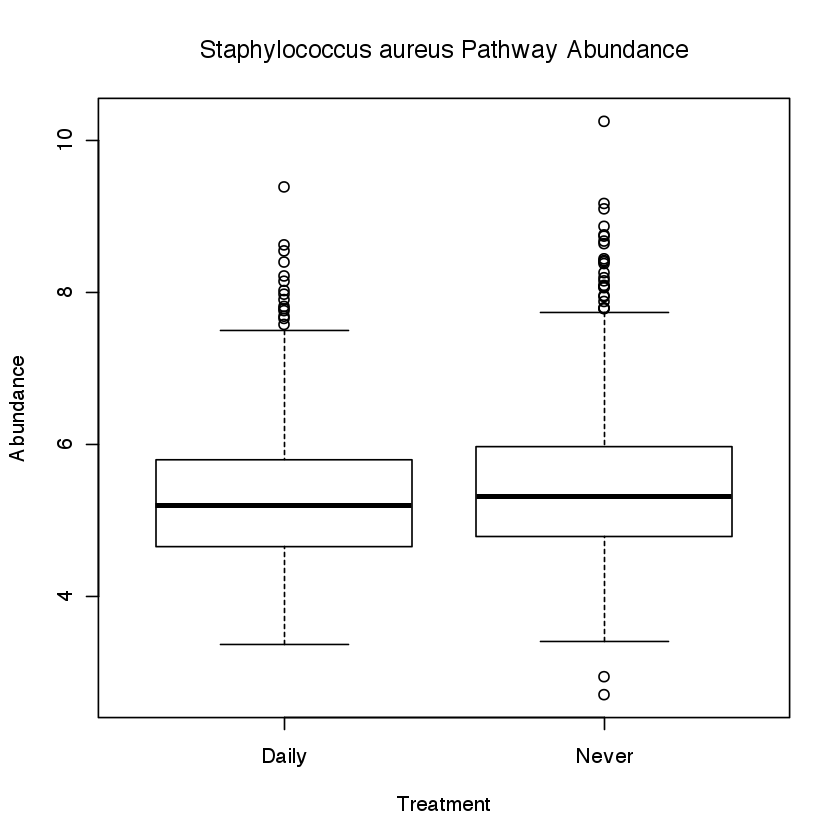

In [33]:
#Anova of Pathway abundaces that were significantly different between treatments
   #Staph Aureus Infection
   #Treatment #Significantly less in drinkers, Same as rats
   lm.staph<-lm(log(Abundance_sig_agp$`Staphylococcus aureus infection`+1)~Abundance_sig_agp$ALCOHOL_FREQUENCY)
   summary(lm.staph)
   boxplot(log(Abundance_sig_agp$`Staphylococcus aureus infection`+1)~Abundance_sig_agp$ALCOHOL_FREQUENCY, main="Staphylococcus aureus Pathway Abundance", xlab="Treatment", ylab="Abundance")
   


Call:
lm(formula = log(Abundance_sig_agp$`Influenza A` + 1) ~ Abundance_sig_agp$ALCOHOL_FREQUENCY)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7272 -2.0341 -0.4246  1.4611  6.5907 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                               2.72722    0.09698   28.12  < 2e-16
Abundance_sig_agp$ALCOHOL_FREQUENCYNever -0.69185    0.11686   -5.92 4.12e-09
                                            
(Intercept)                              ***
Abundance_sig_agp$ALCOHOL_FREQUENCYNever ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.94 on 1283 degrees of freedom
Multiple R-squared:  0.02659,	Adjusted R-squared:  0.02584 
F-statistic: 35.05 on 1 and 1283 DF,  p-value: 4.115e-09


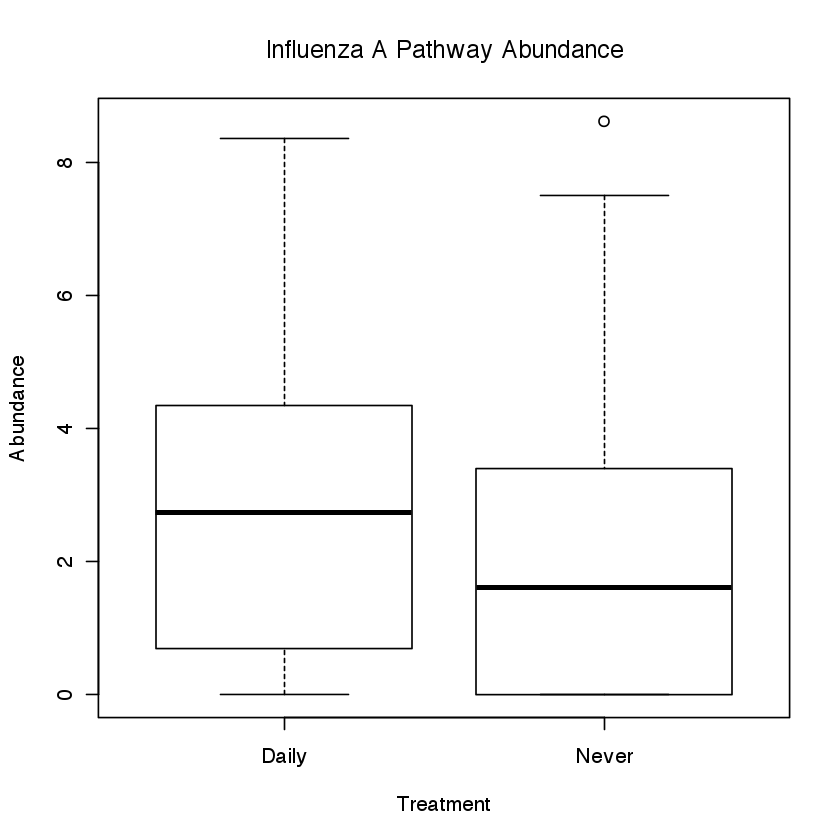

In [34]:
#Influenza A
   #Treatment #Significantly greater in drinkers, same as rats
   lm.flu<-lm(log(Abundance_sig_agp$`Influenza A`+1)~Abundance_sig_agp$ALCOHOL_FREQUENCY)
   summary(lm.flu)
   boxplot(log(Abundance_sig_agp$`Influenza A`+1)~Abundance_sig_agp$ALCOHOL_FREQUENCY, main="Influenza A Pathway Abundance", xlab="Treatment", ylab="Abundance")
  
   


Call:
lm(formula = log(Abundance_sig_agp$`Cell cycle` + 1) ~ Abundance_sig_agp$ALCOHOL_FREQUENCY)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4126 -0.3073 -0.3073 -0.3073  6.6504 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                               0.41264    0.03947  10.454   <2e-16
Abundance_sig_agp$ALCOHOL_FREQUENCYNever -0.10531    0.04756  -2.214    0.027
                                            
(Intercept)                              ***
Abundance_sig_agp$ALCOHOL_FREQUENCYNever *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7895 on 1283 degrees of freedom
Multiple R-squared:  0.003806,	Adjusted R-squared:  0.00303 
F-statistic: 4.902 on 1 and 1283 DF,  p-value: 0.027


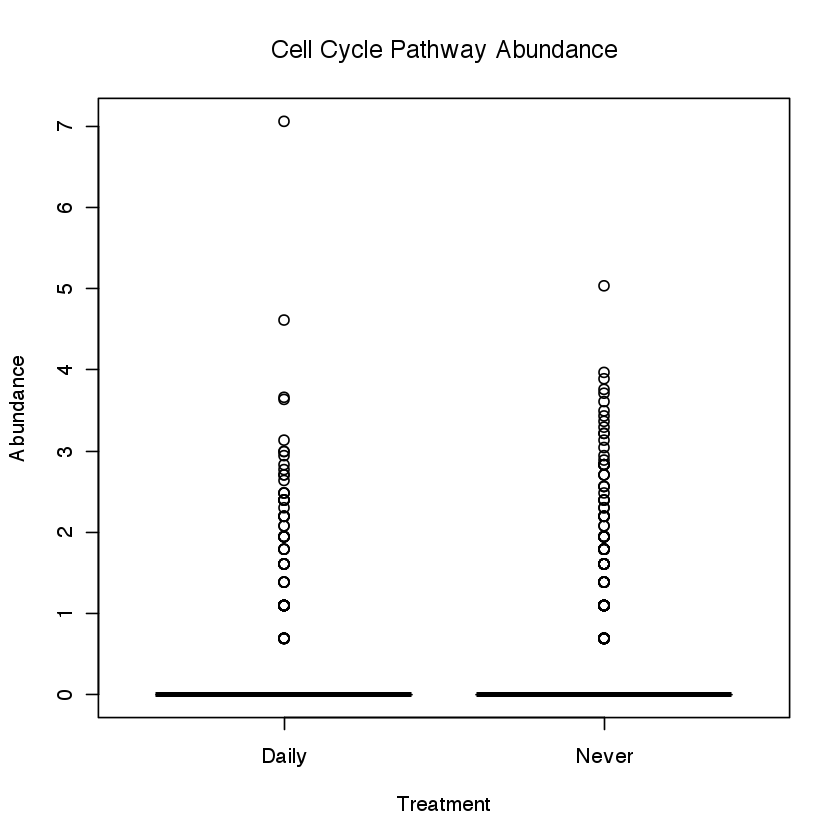

In [35]:
#Cell Cylce
   #Treatment #Significantly greater in drinkers, same as rats
   lm.cc<-lm(log(Abundance_sig_agp$`Cell cycle`+1)~Abundance_sig_agp$ALCOHOL_FREQUENCY)
   summary(lm.cc)
   boxplot(log(Abundance_sig_agp$`Cell cycle`+1)~Abundance_sig_agp$ALCOHOL_FREQUENCY, main="Cell Cycle Pathway Abundance", xlab="Treatment", ylab="Abundance")
   
   


Call:
lm(formula = log(Abundance_sig_agp$`Hepatitis C` + 1) ~ Abundance_sig_agp$ALCOHOL_FREQUENCY)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4126 -0.3073 -0.3073 -0.3073  6.6504 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                               0.41264    0.03947  10.454   <2e-16
Abundance_sig_agp$ALCOHOL_FREQUENCYNever -0.10531    0.04756  -2.214    0.027
                                            
(Intercept)                              ***
Abundance_sig_agp$ALCOHOL_FREQUENCYNever *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7895 on 1283 degrees of freedom
Multiple R-squared:  0.003806,	Adjusted R-squared:  0.00303 
F-statistic: 4.902 on 1 and 1283 DF,  p-value: 0.027


[1] 4.5675

[1] 1.415819

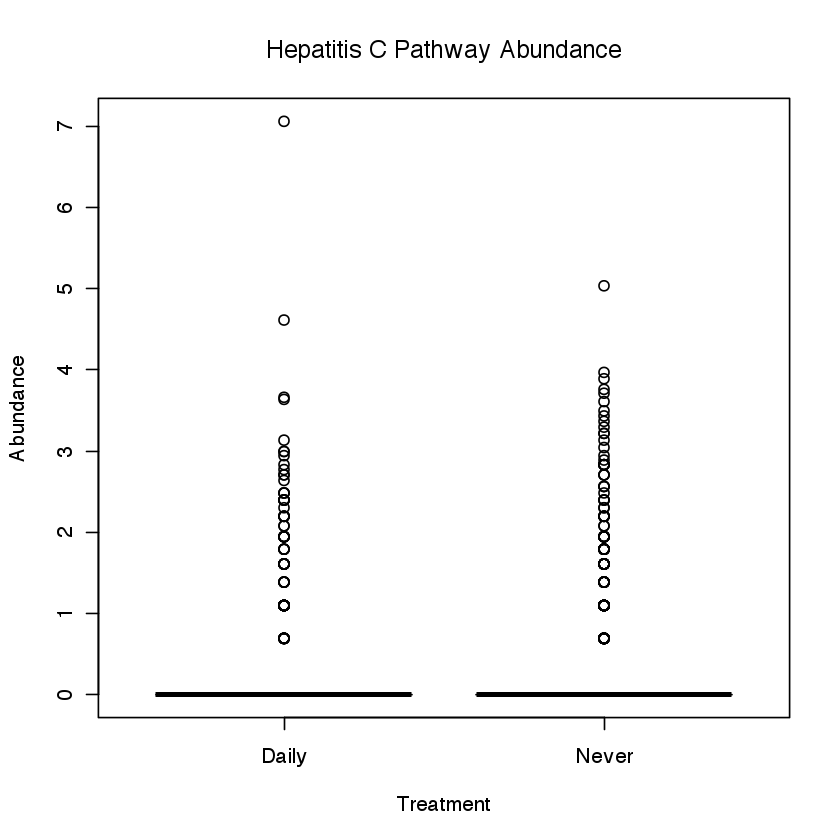

In [36]:
#Hepatitis C
   #Treatment #Significantly greater in drinkers
   lm.hepatitis<-lm(log(Abundance_sig_agp$`Hepatitis C`+1)~Abundance_sig_agp$ALCOHOL_FREQUENCY)
   summary(lm.hepatitis)
   boxplot(log(Abundance_sig_agp$`Hepatitis C`+1)~Abundance_sig_agp$ALCOHOL_FREQUENCY, main="Hepatitis C Pathway Abundance", xlab="Treatment", ylab="Abundance")
   mean(drinkers$`Hepatitis C`)
   mean(nondrinkers$`Hepatitis C`)
   
   


Call:
lm(formula = log(Abundance_sig_agp$Measles + 1) ~ Abundance_sig_agp$ALCOHOL_FREQUENCY)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4126 -0.3073 -0.3073 -0.3073  6.6504 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                               0.41264    0.03947  10.454   <2e-16
Abundance_sig_agp$ALCOHOL_FREQUENCYNever -0.10531    0.04756  -2.214    0.027
                                            
(Intercept)                              ***
Abundance_sig_agp$ALCOHOL_FREQUENCYNever *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7895 on 1283 degrees of freedom
Multiple R-squared:  0.003806,	Adjusted R-squared:  0.00303 
F-statistic: 4.902 on 1 and 1283 DF,  p-value: 0.027


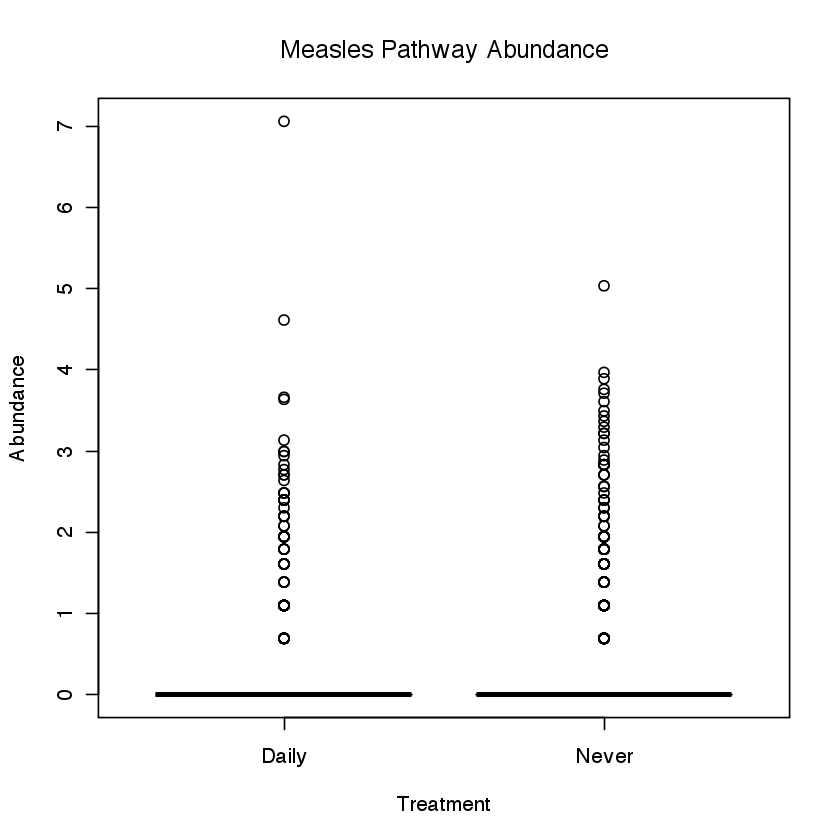

In [37]:
#Measles
   #Treatment #Significantly greater in drinkers
   lm.measles<-lm(log(Abundance_sig_agp$Measles+1)~Abundance_sig_agp$ALCOHOL_FREQUENCY)
   summary(lm.measles)
   boxplot(log(Abundance_sig_agp$Measles+1)~Abundance_sig_agp$ALCOHOL_FREQUENCY, main="Measles Pathway Abundance", xlab="Treatment", ylab="Abundance")
   
   


Call:
lm(formula = log(Abundance_sig_agp$Phagosome + 1) ~ Abundance_sig_agp$ALCOHOL_FREQUENCY)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.3859 -0.2998 -0.2998 -0.2998  6.6772 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                               0.38589    0.03879   9.949   <2e-16
Abundance_sig_agp$ALCOHOL_FREQUENCYNever -0.08609    0.04674  -1.842   0.0657
                                            
(Intercept)                              ***
Abundance_sig_agp$ALCOHOL_FREQUENCYNever .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7758 on 1283 degrees of freedom
Multiple R-squared:  0.002637,	Adjusted R-squared:  0.00186 
F-statistic: 3.392 on 1 and 1283 DF,  p-value: 0.06573


[1] 4.475

[1] 1.378531

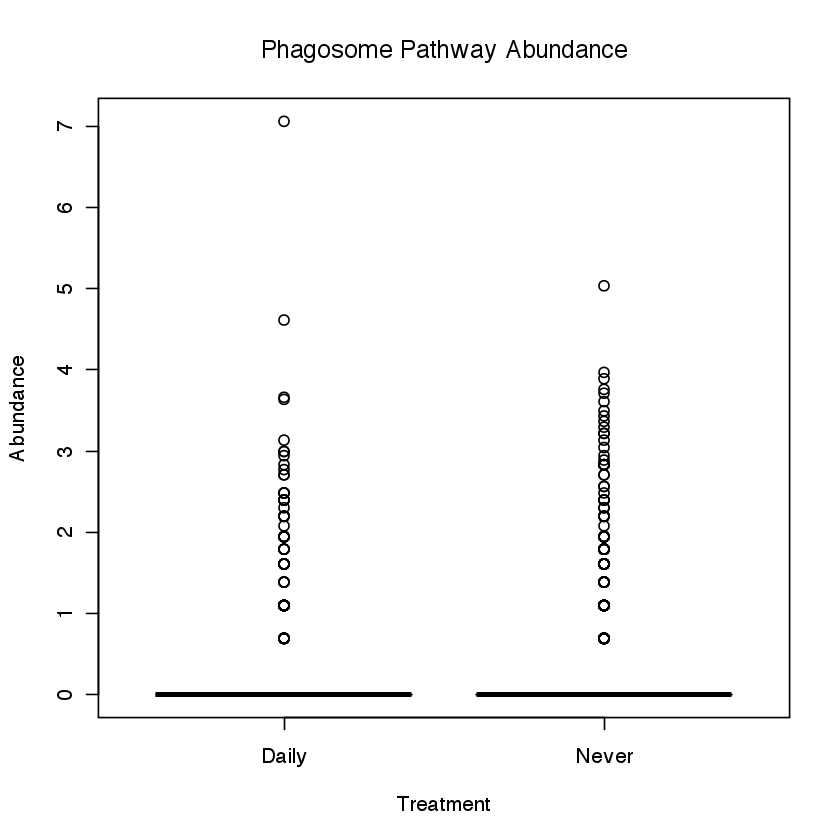

In [38]:
#Phagosome
   #Treatment #Sginificantly greater in drinkers
   lm.phagosome<-lm(log(Abundance_sig_agp$Phagosome+1)~Abundance_sig_agp$ALCOHOL_FREQUENCY)
   summary(lm.phagosome)
   boxplot(log(Abundance_sig_agp$Phagosome+1)~Abundance_sig_agp$ALCOHOL_FREQUENCY, main="Phagosome Pathway Abundance", xlab="Treatment", ylab="Abundance")
   mean(drinkers$Phagosome)
   mean(nondrinkers$Phagosome)
   
   


Call:
lm(formula = log(Abundance_sig_agp$`Vibrio cholerae infection` + 
    1) ~ Abundance_sig_agp$ALCOHOL_FREQUENCY)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6625 -0.6330 -0.6330  0.4362  7.0998 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                               0.66246    0.06096  10.867   <2e-16
Abundance_sig_agp$ALCOHOL_FREQUENCYNever -0.02950    0.07346  -0.402    0.688
                                            
(Intercept)                              ***
Abundance_sig_agp$ALCOHOL_FREQUENCYNever    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.219 on 1283 degrees of freedom
Multiple R-squared:  0.0001257,	Adjusted R-squared:  -0.0006536 
F-statistic: 0.1613 on 1 and 1283 DF,  p-value: 0.688


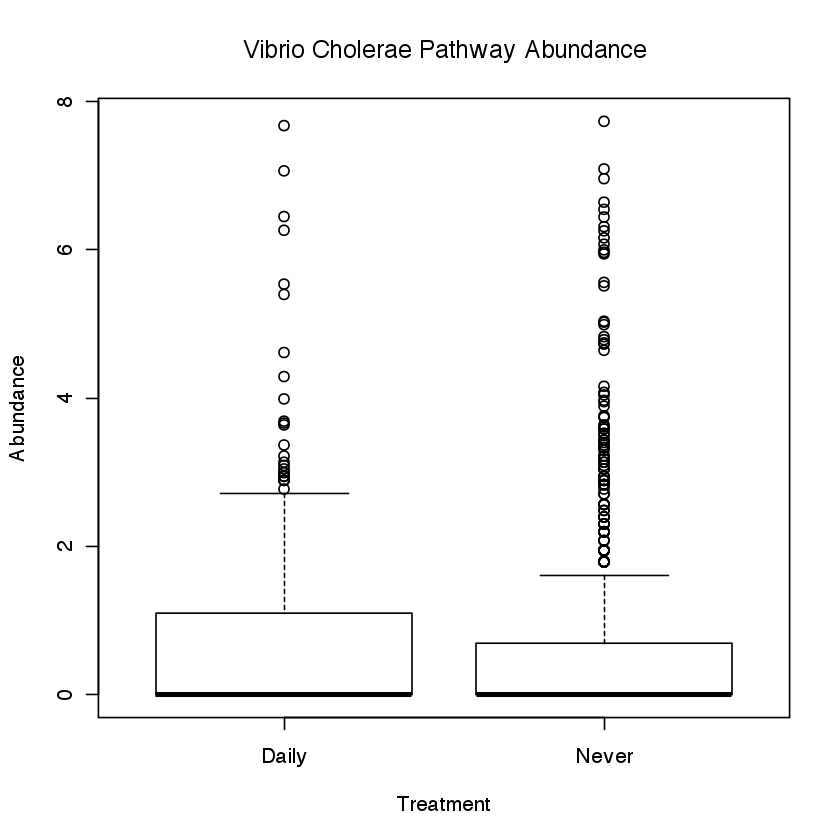

In [39]:
#Vibrio Cholerae
   #Treatment #Greater in drinkers, same in rats
   lm.vibrio<-lm(log(Abundance_sig_agp$`Vibrio cholerae infection`+1)~Abundance_sig_agp$ALCOHOL_FREQUENCY)
   summary(lm.vibrio)
   boxplot(log(Abundance_sig_agp$`Vibrio cholerae infection`+1)~Abundance_sig_agp$ALCOHOL_FREQUENCY, main="Vibrio Cholerae Pathway Abundance", xlab="Treatment", ylab="Abundance")
   
   


Call:
lm(formula = log(Abundance_sig_agp$`mRNA surveillance pathway` + 
    1) ~ Abundance_sig_agp$ALCOHOL_FREQUENCY)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5872 -0.4320 -0.4320 -0.4320  7.1686 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                               0.58719    0.05068  11.586   <2e-16
Abundance_sig_agp$ALCOHOL_FREQUENCYNever -0.15522    0.06107  -2.542   0.0112
                                            
(Intercept)                              ***
Abundance_sig_agp$ALCOHOL_FREQUENCYNever *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.014 on 1283 degrees of freedom
Multiple R-squared:  0.00501,	Adjusted R-squared:  0.004234 
F-statistic:  6.46 on 1 and 1283 DF,  p-value: 0.01115


[1] 9.3

[1] 2.902825

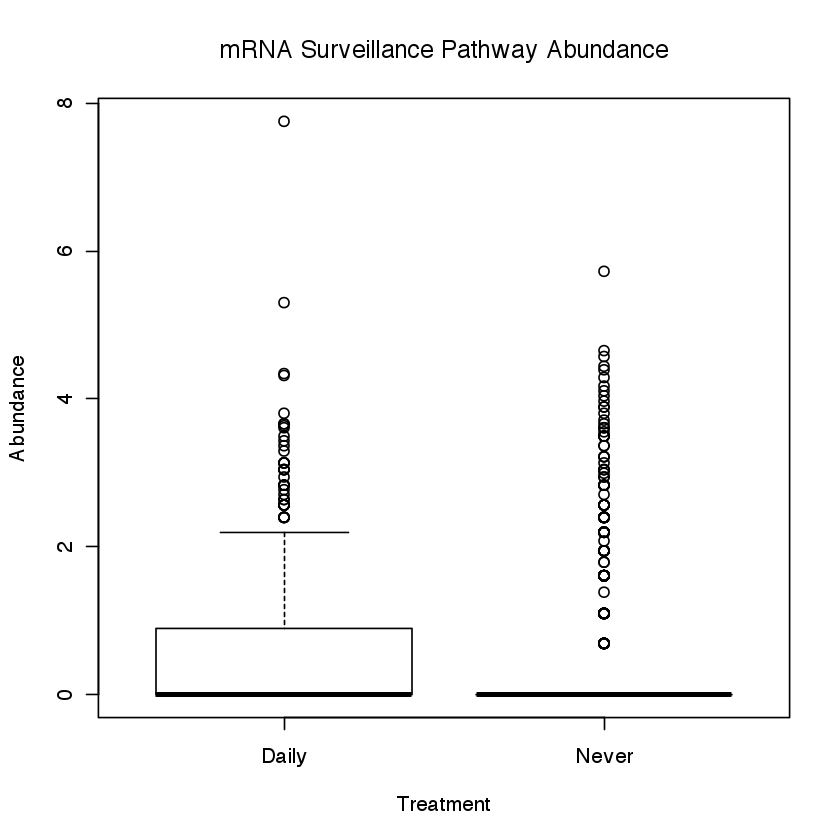

In [40]:
#mRNA Surveillance Pathway
   #Treatment #Significantly greater in drinkers, same in rats
   lm.mRNA<-lm(log(Abundance_sig_agp$`mRNA surveillance pathway`+1)~Abundance_sig_agp$ALCOHOL_FREQUENCY)
   summary(lm.mRNA)
   boxplot(log(Abundance_sig_agp$`mRNA surveillance pathway`+1)~Abundance_sig_agp$ALCOHOL_FREQUENCY, main="mRNA Surveillance Pathway Abundance", xlab="Treatment", ylab="Abundance")
   mean(drinkers$`mRNA surveillance pathway`)
   mean(nondrinkers$`mRNA surveillance pathway`)
   
   


Call:
lm(formula = log(Abundance_sig_agp$`mTOR signaling pathway` + 
    1) ~ Abundance_sig_agp$ALCOHOL_FREQUENCY)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4126 -0.3073 -0.3073 -0.3073  6.6504 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                               0.41264    0.03947  10.454   <2e-16
Abundance_sig_agp$ALCOHOL_FREQUENCYNever -0.10531    0.04756  -2.214    0.027
                                            
(Intercept)                              ***
Abundance_sig_agp$ALCOHOL_FREQUENCYNever *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7895 on 1283 degrees of freedom
Multiple R-squared:  0.003806,	Adjusted R-squared:  0.00303 
F-statistic: 4.902 on 1 and 1283 DF,  p-value: 0.027


[1] 4.5675

[1] 1.415819

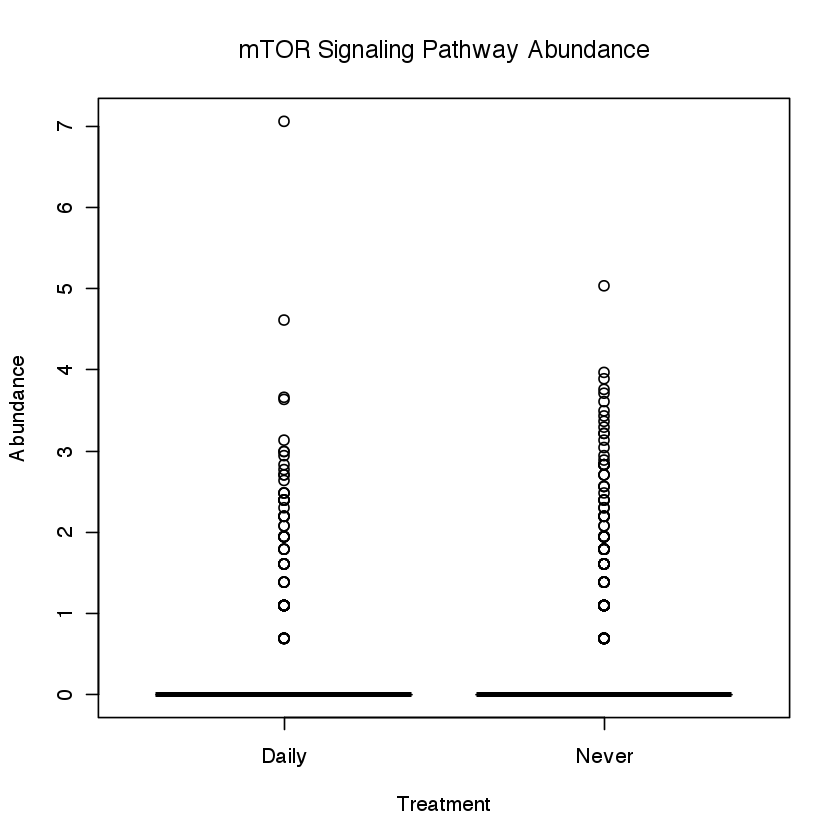

In [41]:
#mTOR Signaling Pathway
   #Treatment #Significantly greater in drinkers, same in rats
   lm.mTOR<-lm(log(Abundance_sig_agp$`mTOR signaling pathway`+1)~Abundance_sig_agp$ALCOHOL_FREQUENCY)
   summary(lm.mTOR)
   boxplot(log(Abundance_sig_agp$`mTOR signaling pathway`+1)~Abundance_sig_agp$ALCOHOL_FREQUENCY, main="mTOR Signaling Pathway Abundance", xlab="Treatment", ylab="Abundance")
   mean(drinkers$`mTOR signaling pathway`)
   mean(nondrinkers$`mTOR signaling pathway`)
   
   


Call:
lm(formula = log(Abundance_sig_agp$`G protein-coupled receptors` + 
    1) ~ Abundance_sig_agp$ALCOHOL_FREQUENCY)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5243 -0.5243 -0.4550  0.2382  5.7795 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                               0.45496    0.04355  10.446   <2e-16
Abundance_sig_agp$ALCOHOL_FREQUENCYNever  0.06936    0.05248   1.322    0.187
                                            
(Intercept)                              ***
Abundance_sig_agp$ALCOHOL_FREQUENCYNever    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8711 on 1283 degrees of freedom
Multiple R-squared:  0.001359,	Adjusted R-squared:  0.000581 
F-statistic: 1.746 on 1 and 1283 DF,  p-value: 0.1866


[1] 3.6425

[1] 2.099435

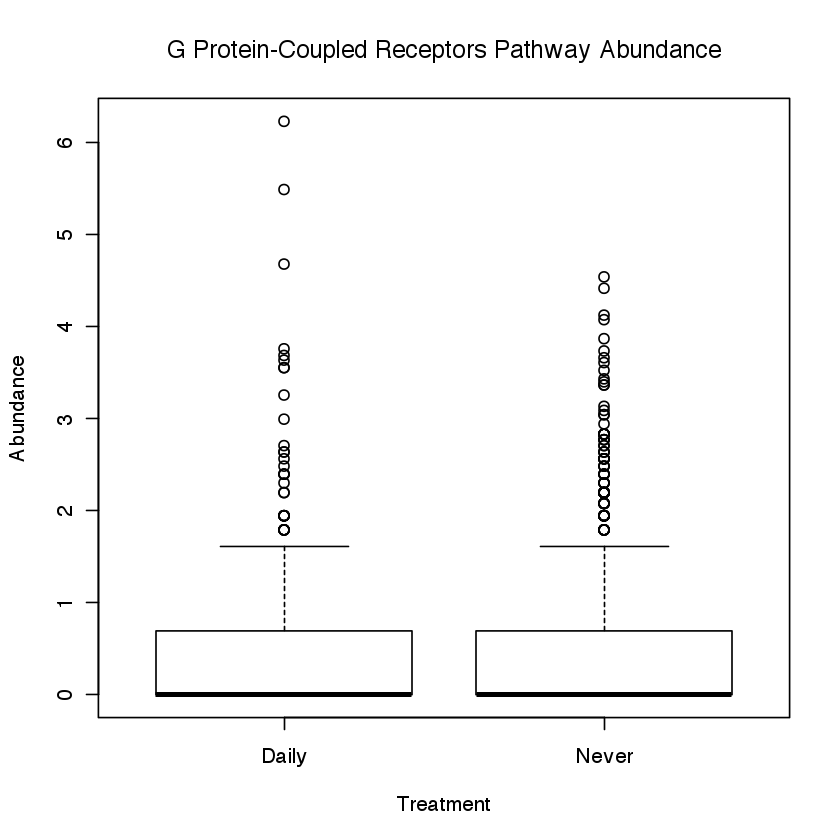

In [42]:
#G protein-coupled
   #Treatment #higher in drinkers
   lm.gprotein<-lm(log(Abundance_sig_agp$`G protein-coupled receptors`+1)~Abundance_sig_agp$ALCOHOL_FREQUENCY)
   summary(lm.gprotein)
   boxplot(log(Abundance_sig_agp$`G protein-coupled receptors`+1)~Abundance_sig_agp$ALCOHOL_FREQUENCY, main="G Protein-Coupled Receptors Pathway Abundance", xlab="Treatment", ylab="Abundance")
   mean(drinkers$`G protein-coupled receptors`)
   mean(nondrinkers$`G protein-coupled receptors`)

In [58]:
#Rat PICRUSt Analysis
#Function Category Analysis
    cat_function<-read.delim("Function_cat_Ranalysis.txt", header=T)
    #Merge categories and taxonomic data
    catFunction_taxa<-merge(cat_function, OTU_table)
    catFunction_taxa[,2:14]<-sapply(catFunction_taxa[,2:14], as.character)
    catFunction_taxa[,2:14]<-sapply(catFunction_taxa[,2:14], as.numeric)

In [59]:
#Merging sample treatment metadata with taxa_KO
mapping_file<-read.delim("Update_Rat_Map.txt", header=T)
  mapping_file$Treatment[mapping_file$Description=="1"]<-"Non-drinkers"
  mapping_file$Treatment[mapping_file$Description=="2"]<-"Drinkers"
  colnames(mapping_file)[1]<-"Sample"
  mapping_subset<-mapping_file[,c(1,7,8,9,10)]

In [60]:
#Taxonomic Analysis, data has been normalized
   # table_otu<-read.delim("~/Documents/Thesis_Material/Rat_Alcohol/PICRUSt_rat/01_closedRef_OTUS/hdf5/Sig_otus_gene_Ranalysis.txt", header=T)
    table_otu<-read.csv("Sig_otus_gene_Ranalysis.csv", header=T)
    OTU_table<-table_otu[-67,]
    colnames(OTU_table)[1]<-"Sample"
    OTU_table<-merge(OTU_table, mapping_subset)
    OTU_table$Treatment[OTU_table$Description=="1"]<-"Non-drinkers"
    OTU_table$Treatment[OTU_table$Description=="2"]<-"Drinkers"
    OTU_table[,2:30]<-sapply(OTU_table[,2:30], as.character)
    OTU_table[,2:30]<-sapply(OTU_table[,2:30], as.numeric)
    
    


Call:
lm(formula = log(catFunction_taxa$Staphylococcus.aureus.infection + 
    1) ~ catFunction_taxa$Time_point * catFunction_taxa$Treatment)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.79177 -0.46938 -0.05429  0.61256  1.75290 

Coefficients:
                                                                   Estimate
(Intercept)                                                         4.52572
catFunction_taxa$Time_point                                         0.07821
catFunction_taxa$TreatmentNon-drinkers                              1.50967
catFunction_taxa$Time_point:catFunction_taxa$TreatmentNon-drinkers -0.07515
                                                                   Std. Error
(Intercept)                                                           0.35593
catFunction_taxa$Time_point                                           0.16256
catFunction_taxa$TreatmentNon-drinkers                                0.51487
catFunction_taxa$Time_point:catFunction_taxa$T


Call:
lm(formula = log(catFunction_taxa$Staphylococcus.aureus.infection + 
    1) ~ catFunction_taxa$Treatment)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.79407 -0.46947 -0.08439  0.63193  1.75280 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                              4.6844     0.1318  35.554  < 2e-16 ***
catFunction_taxa$TreatmentNon-drinkers   1.3572     0.1892   7.172 9.26e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7683 on 64 degrees of freedom
Multiple R-squared:  0.4456,	Adjusted R-squared:  0.437 
F-statistic: 51.44 on 1 and 64 DF,  p-value: 9.261e-10


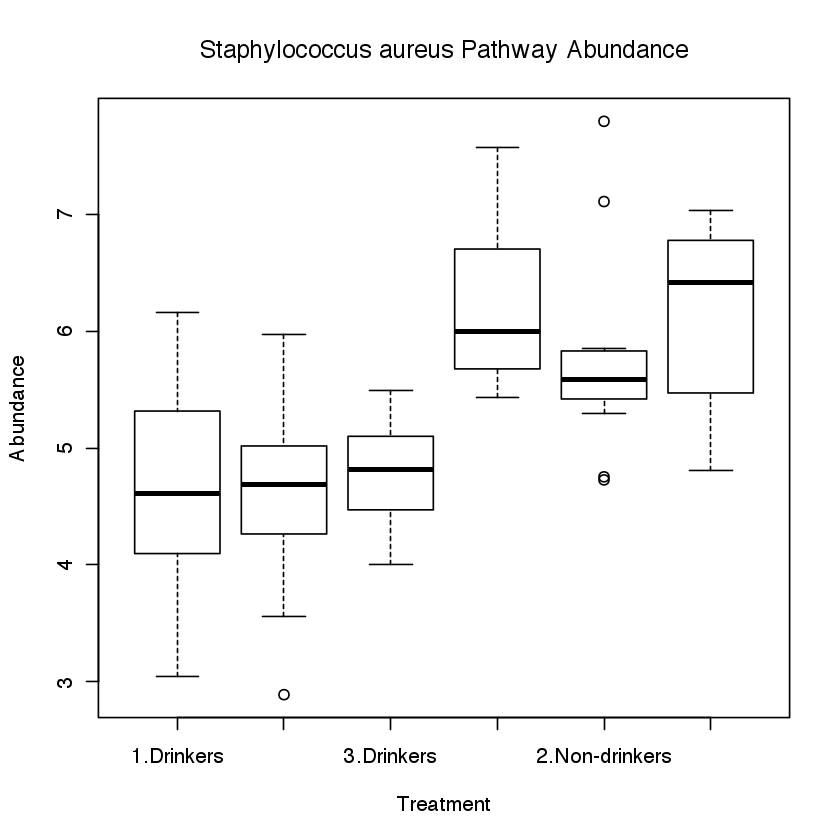

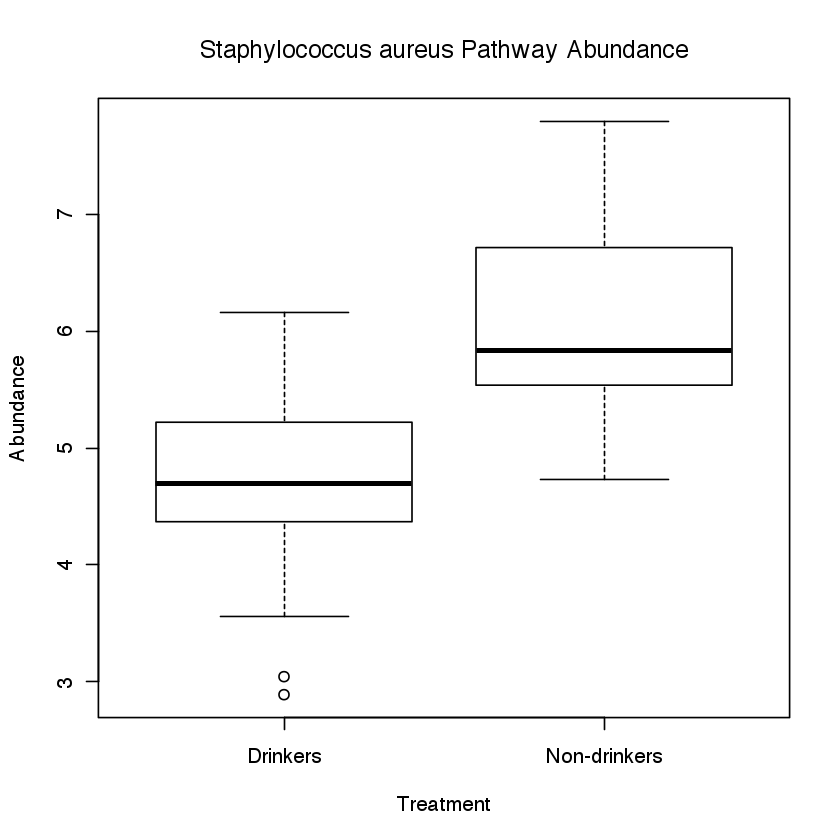

In [61]:
#Staph Aureus Infection
      #Time*Treatment
      lm.staph<-lm(log(catFunction_taxa$Staphylococcus.aureus.infection+1)~catFunction_taxa$Time_point*catFunction_taxa$Treatment)
      summary(lm.staph)
      boxplot(log(catFunction_taxa$Staphylococcus.aureus.infection+1)~catFunction_taxa$Time_point*catFunction_taxa$Treatment, main="Staphylococcus aureus Pathway Abundance", xlab="Treatment", ylab="Abundance")
      #Treatment #Significantly less in drinkers
      lm.staph<-lm(log(catFunction_taxa$Staphylococcus.aureus.infection+1)~catFunction_taxa$Treatment)
      summary(lm.staph)
      boxplot(log(catFunction_taxa$Staphylococcus.aureus.infection+1)~catFunction_taxa$Treatment, main="Staphylococcus aureus Pathway Abundance", xlab="Treatment", ylab="Abundance")
      


Call:
lm(formula = log(catFunction_taxa$Influenza.A + 1) ~ catFunction_taxa$Time_point * 
    catFunction_taxa$Treatment)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8920 -0.7148 -0.1435  0.8365  2.0003 

Coefficients:
                                                                   Estimate
(Intercept)                                                         2.49947
catFunction_taxa$Time_point                                         0.49065
catFunction_taxa$TreatmentNon-drinkers                             -0.08256
catFunction_taxa$Time_point:catFunction_taxa$TreatmentNon-drinkers -0.22993
                                                                   Std. Error
(Intercept)                                                           0.44255
catFunction_taxa$Time_point                                           0.20212
catFunction_taxa$TreatmentNon-drinkers                                0.64017
catFunction_taxa$Time_point:catFunction_taxa$TreatmentNon-drinkers    0.2925


Call:
lm(formula = log(catFunction_taxa$Influenza.A + 1) ~ catFunction_taxa$Treatment)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8858 -0.7229 -0.1739  0.9024  1.9439 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                              3.4952     0.1730  20.202   <2e-16 ***
catFunction_taxa$TreatmentNon-drinkers  -0.5487     0.2485  -2.208   0.0308 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.009 on 64 degrees of freedom
Multiple R-squared:  0.0708,	Adjusted R-squared:  0.05628 
F-statistic: 4.877 on 1 and 64 DF,  p-value: 0.03081


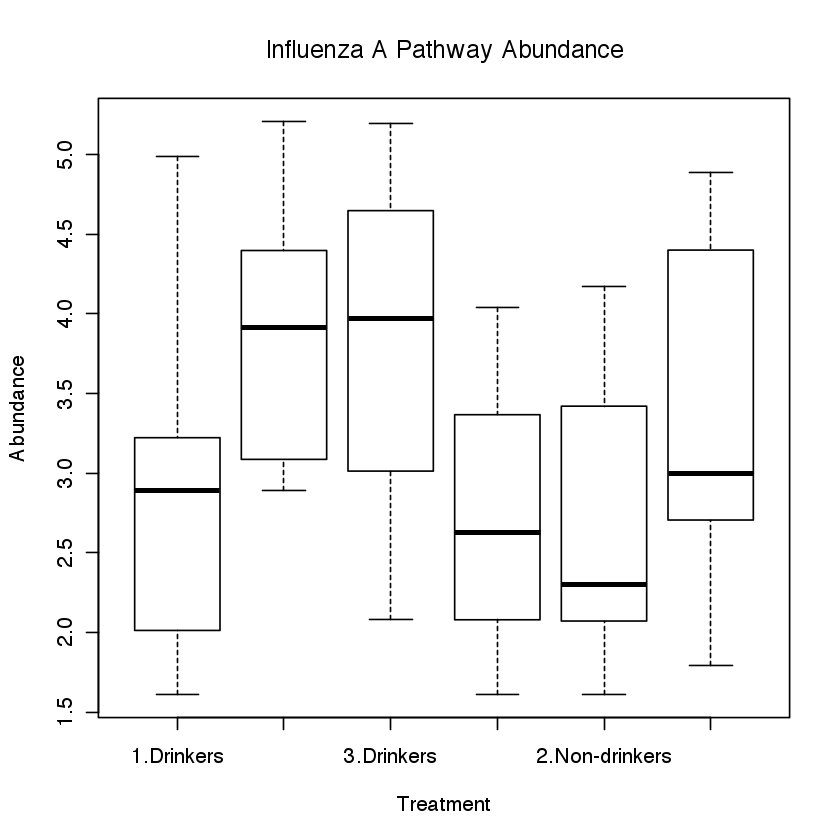

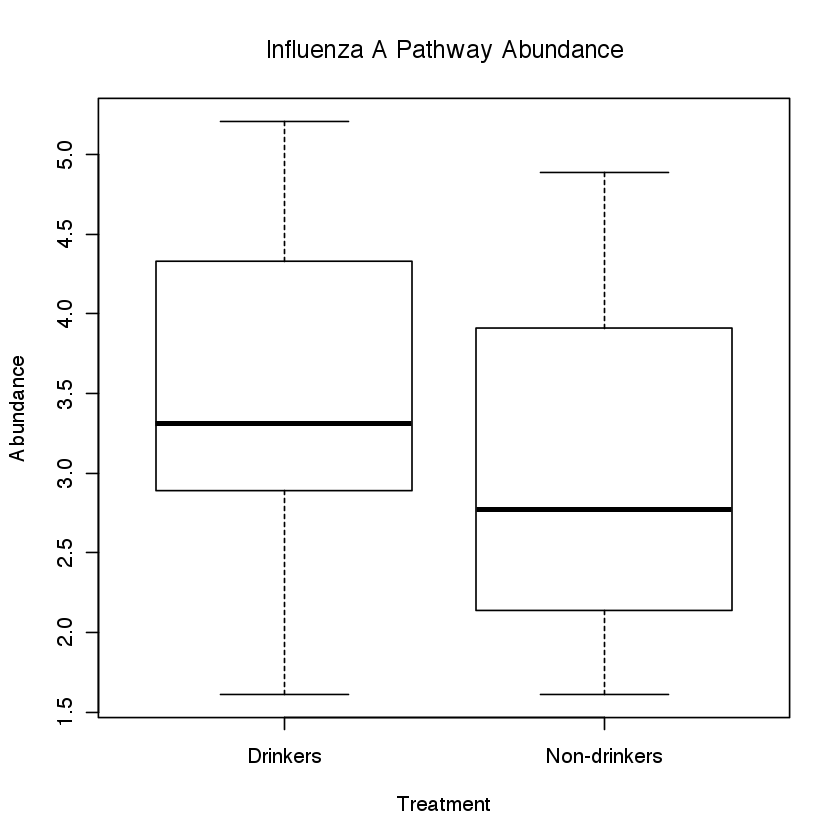

In [66]:
#Influenza A
      #Time*Treatment
      lm.influenza<-lm(log(catFunction_taxa$Influenza.A+1)~catFunction_taxa$Time_point*catFunction_taxa$Treatment)
      summary(lm.influenza)
      boxplot(log(catFunction_taxa$Influenza.A+1)~catFunction_taxa$Time_point*catFunction_taxa$Treatment, main="Influenza A Pathway Abundance", xlab="Treatment", ylab="Abundance")
      #Treatment #Significantly greater in drinkers
      lm.influenza<-lm(log(catFunction_taxa$Influenza.A+1)~catFunction_taxa$Treatment)
      summary(lm.influenza)
      boxplot(log(catFunction_taxa$Influenza.A+1)~catFunction_taxa$Treatment, main="Influenza A Pathway Abundance", xlab="Treatment", ylab="Abundance")
      
   


Call:
lm(formula = log(catFunction_taxa$Bile.secretion + 1) ~ Time_point * 
    Treatment)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.27884 -0.94012 -0.06414  1.02889  2.13041 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       2.15744    0.54544   3.955 0.000199 ***
Time_point                        0.47490    0.24911   1.906 0.061237 .  
TreatmentNon-drinkers            -0.03767    0.78901  -0.048 0.962079    
Time_point:TreatmentNon-drinkers -0.31583    0.36061  -0.876 0.384498    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.194 on 62 degrees of freedom
Multiple R-squared:  0.1308,	Adjusted R-squared:  0.08871 
F-statistic: 3.109 on 3 and 62 DF,  p-value: 0.03269



Call:
lm(formula = log(catFunction_taxa$Bile.secretion + 1) ~ Treatment)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4429 -0.9013 -0.1329  0.9977  2.2845 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)             3.1212     0.2079  15.010   <2e-16 ***
TreatmentNon-drinkers  -0.6783     0.2986  -2.271   0.0265 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.213 on 64 degrees of freedom
Multiple R-squared:  0.0746,	Adjusted R-squared:  0.06014 
F-statistic: 5.159 on 1 and 64 DF,  p-value: 0.02649


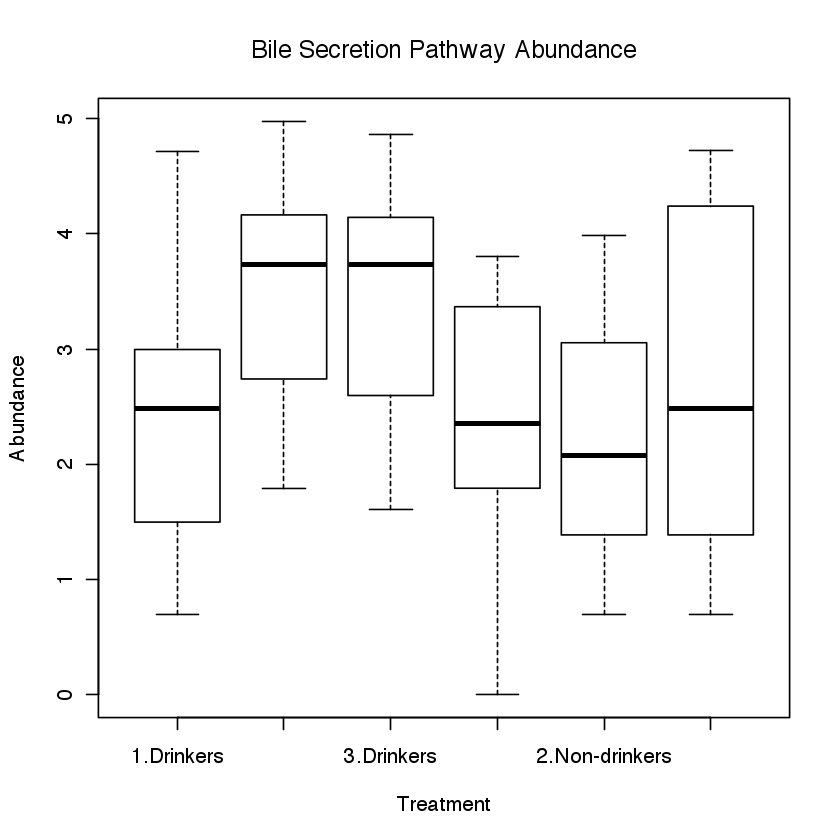

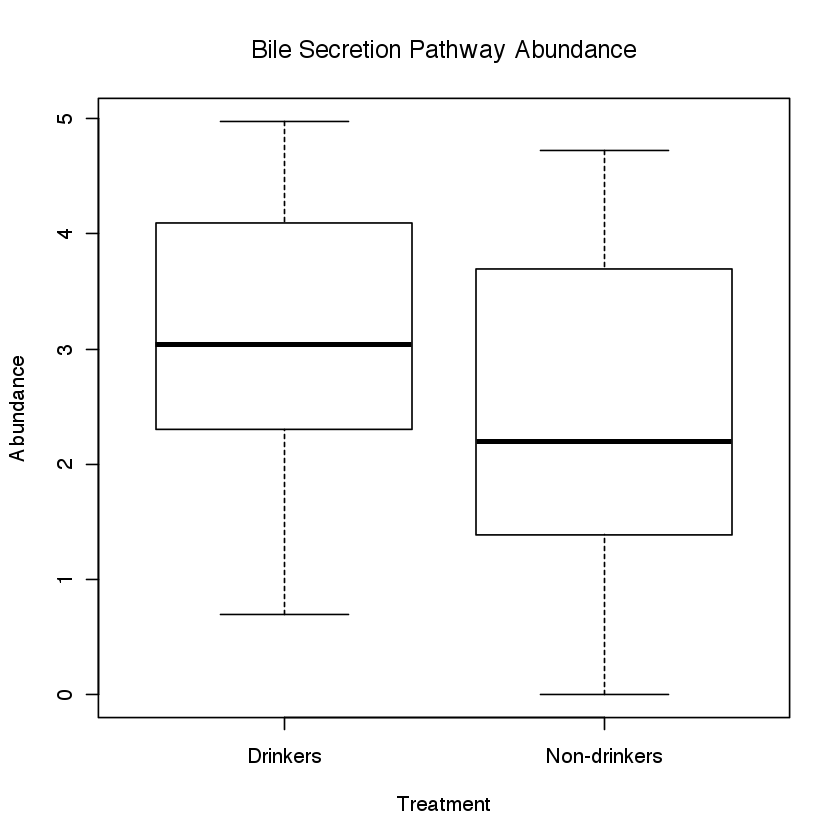

In [68]:
#Bile Secretion
      #Time*Treatment
      lm.bile<-lm(log(catFunction_taxa$Bile.secretion+1)~Time_point*Treatment)
      summary(lm.bile)
      boxplot(log(catFunction_taxa$Bile.secretion+1)~Time_point*Treatment, main="Bile Secretion Pathway Abundance", xlab="Treatment", ylab="Abundance")
      #Treatment #Greater in drinkers
      lm.bile<-lm(log(catFunction_taxa$Bile.secretion+1)~Treatment)
      summary(lm.bile)
      boxplot(log(catFunction_taxa$Bile.secretion+1)~Treatment, main="Bile Secretion Pathway Abundance", xlab="Treatment", ylab="Abundance")
      
  


Call:
lm(formula = log(catFunction_taxa$Cell.cycle + 1) ~ Time_point * 
    Treatment)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.27884 -0.94012 -0.06414  1.02889  2.13041 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       2.15744    0.54544   3.955 0.000199 ***
Time_point                        0.47490    0.24911   1.906 0.061237 .  
TreatmentNon-drinkers            -0.03767    0.78901  -0.048 0.962079    
Time_point:TreatmentNon-drinkers -0.31583    0.36061  -0.876 0.384498    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.194 on 62 degrees of freedom
Multiple R-squared:  0.1308,	Adjusted R-squared:  0.08871 
F-statistic: 3.109 on 3 and 62 DF,  p-value: 0.03269



Call:
lm(formula = log(catFunction_taxa$Cell.cycle + 1) ~ Treatment)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4429 -0.9013 -0.1329  0.9977  2.2845 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)             3.1212     0.2079  15.010   <2e-16 ***
TreatmentNon-drinkers  -0.6783     0.2986  -2.271   0.0265 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.213 on 64 degrees of freedom
Multiple R-squared:  0.0746,	Adjusted R-squared:  0.06014 
F-statistic: 5.159 on 1 and 64 DF,  p-value: 0.02649


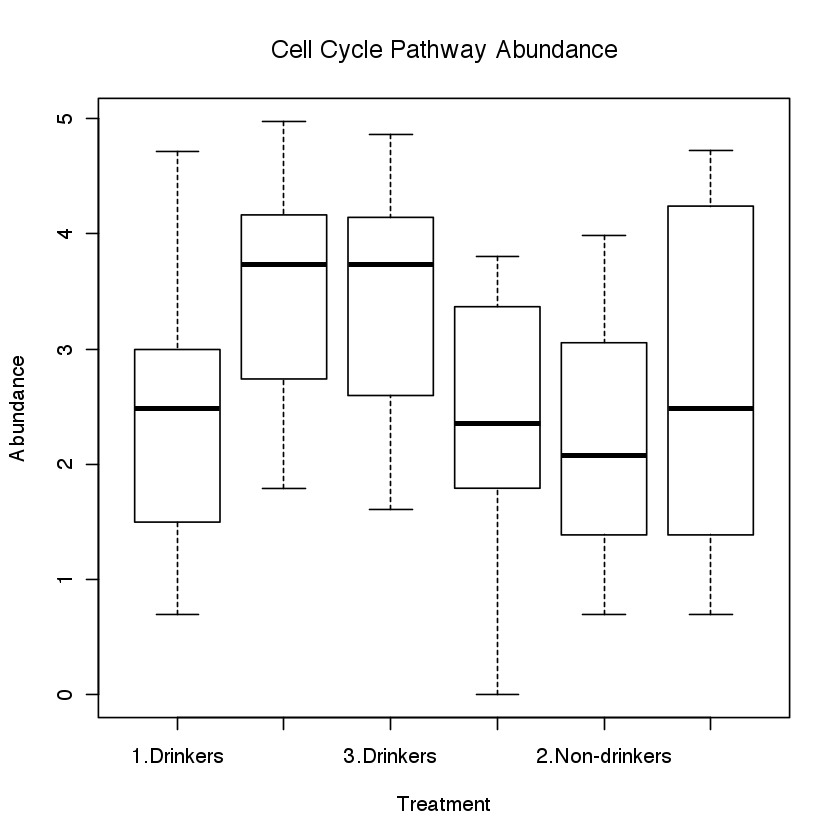

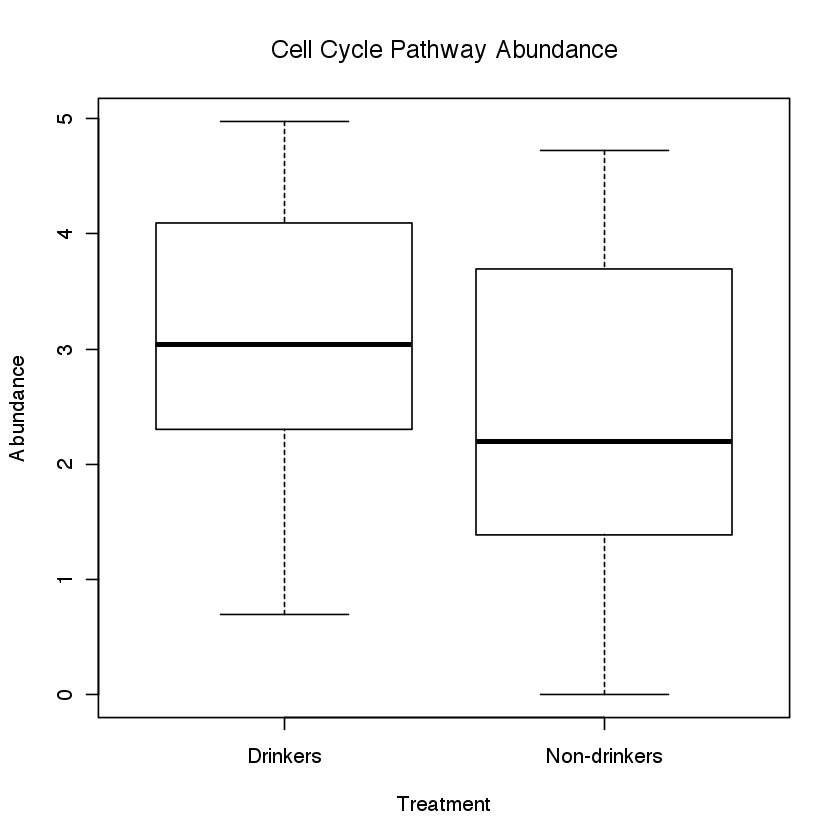

In [69]:
 #Cell Cycle
      #Time*Treatment
      lm.cell_cycle<-lm(log(catFunction_taxa$Cell.cycle+1)~Time_point*Treatment)
      summary(lm.cell_cycle)
      boxplot(log(catFunction_taxa$Cell.cycle+1)~Time_point*Treatment, main="Cell Cycle Pathway Abundance", xlab="Treatment", ylab="Abundance")
      #Treatment #Greater in drinkers
      lm.cell_cycle<-lm(log(catFunction_taxa$Cell.cycle+1)~Treatment)
      summary(lm.cell_cycle)
      boxplot(log(catFunction_taxa$Cell.cycle+1)~Treatment, main="Cell Cycle Pathway Abundance", xlab="Treatment", ylab="Abundance")
      
   


Call:
lm(formula = log(catFunction_taxa$Hepatitis.C + 1) ~ Time_point * 
    Treatment)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.27884 -0.94012 -0.06414  1.02889  2.13041 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       2.15744    0.54544   3.955 0.000199 ***
Time_point                        0.47490    0.24911   1.906 0.061237 .  
TreatmentNon-drinkers            -0.03767    0.78901  -0.048 0.962079    
Time_point:TreatmentNon-drinkers -0.31583    0.36061  -0.876 0.384498    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.194 on 62 degrees of freedom
Multiple R-squared:  0.1308,	Adjusted R-squared:  0.08871 
F-statistic: 3.109 on 3 and 62 DF,  p-value: 0.03269



Call:
lm(formula = log(catFunction_taxa$Hepatitis.C + 1) ~ Treatment)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4429 -0.9013 -0.1329  0.9977  2.2845 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)             3.1212     0.2079  15.010   <2e-16 ***
TreatmentNon-drinkers  -0.6783     0.2986  -2.271   0.0265 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.213 on 64 degrees of freedom
Multiple R-squared:  0.0746,	Adjusted R-squared:  0.06014 
F-statistic: 5.159 on 1 and 64 DF,  p-value: 0.02649


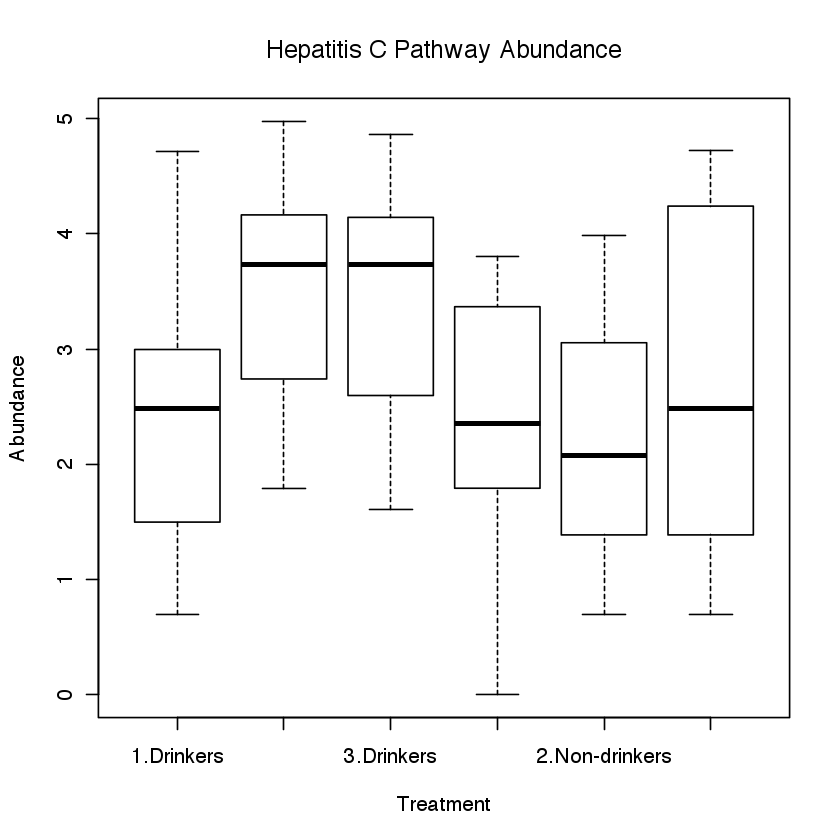

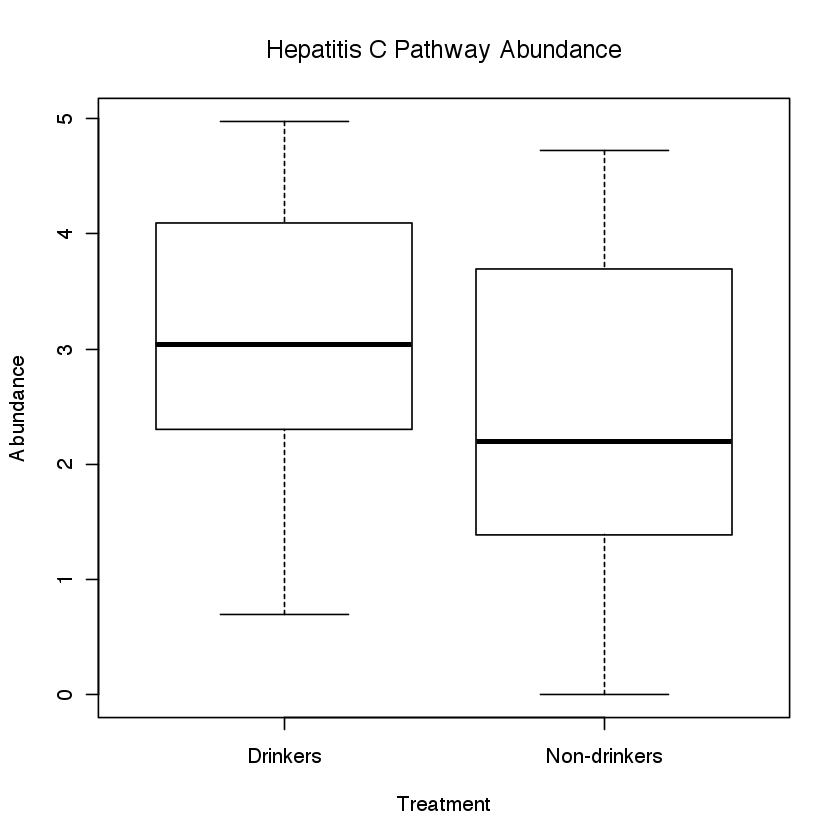

In [71]:
#Hepatitis C
      #Time*Treatment
      lm.hepatitis<-lm(log(catFunction_taxa$Hepatitis.C+1)~Time_point*Treatment)
      summary(lm.hepatitis)
      boxplot(log(catFunction_taxa$Hepatitis.C+1)~Time_point*Treatment, main="Hepatitis C Pathway Abundance", xlab="Treatment", ylab="Abundance")
      #Treatment #Significantly greater in drinkers
      lm.hepatitis<-lm(log(catFunction_taxa$Hepatitis.C+1)~Treatment)
      summary(lm.hepatitis)
      boxplot(log(catFunction_taxa$Hepatitis.C+1)~Treatment, main="Hepatitis C Pathway Abundance", xlab="Treatment", ylab="Abundance")
      
   


Call:
lm(formula = log(catFunction_taxa$Measles + 1) ~ Time_point * 
    Treatment)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.27884 -0.94012 -0.06414  1.02889  2.13041 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       2.15744    0.54544   3.955 0.000199 ***
Time_point                        0.47490    0.24911   1.906 0.061237 .  
TreatmentNon-drinkers            -0.03767    0.78901  -0.048 0.962079    
Time_point:TreatmentNon-drinkers -0.31583    0.36061  -0.876 0.384498    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.194 on 62 degrees of freedom
Multiple R-squared:  0.1308,	Adjusted R-squared:  0.08871 
F-statistic: 3.109 on 3 and 62 DF,  p-value: 0.03269



Call:
lm(formula = log(catFunction_taxa$Measles + 1) ~ Treatment)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4429 -0.9013 -0.1329  0.9977  2.2845 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)             3.1212     0.2079  15.010   <2e-16 ***
TreatmentNon-drinkers  -0.6783     0.2986  -2.271   0.0265 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.213 on 64 degrees of freedom
Multiple R-squared:  0.0746,	Adjusted R-squared:  0.06014 
F-statistic: 5.159 on 1 and 64 DF,  p-value: 0.02649


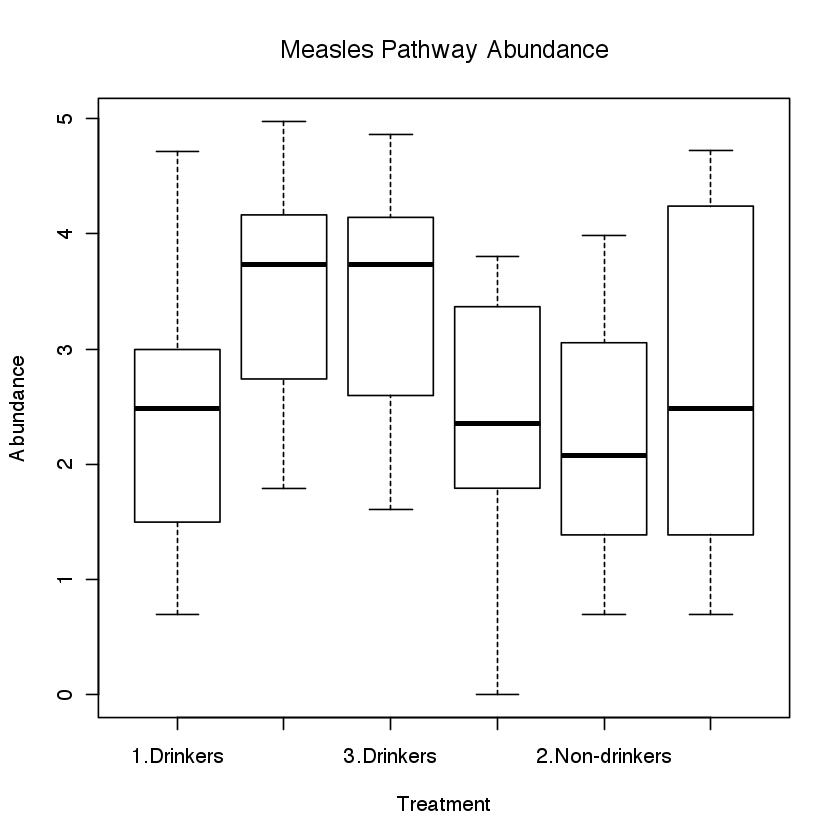

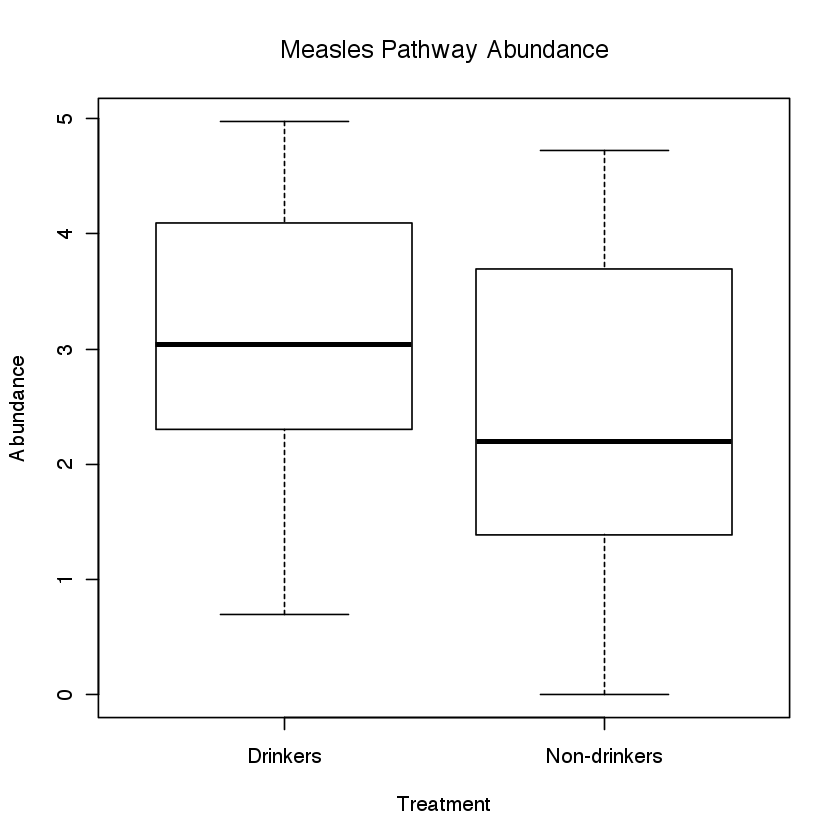

In [72]:
#Measles
      #Time*Treatment
      lm.measles<-lm(log(catFunction_taxa$Measles+1)~Time_point*Treatment)
      summary(lm.measles)
      boxplot(log(catFunction_taxa$Measles+1)~Time_point*Treatment, main="Measles Pathway Abundance", xlab="Treatment", ylab="Abundance")
      #Treatment #Greater in drinkers
      lm.measles<-lm(log(catFunction_taxa$Measles+1)~Treatment)
      summary(lm.measles)
      boxplot(log(catFunction_taxa$Measles+1)~Treatment, main="Measles Pathway Abundance", xlab="Treatment", ylab="Abundance")
      
   


Call:
lm(formula = log(catFunction_taxa$Phagosome + 1) ~ Time_point * 
    Treatment)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.27884 -0.94012 -0.06414  1.02889  2.13041 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       2.15744    0.54544   3.955 0.000199 ***
Time_point                        0.47490    0.24911   1.906 0.061237 .  
TreatmentNon-drinkers            -0.03767    0.78901  -0.048 0.962079    
Time_point:TreatmentNon-drinkers -0.31583    0.36061  -0.876 0.384498    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.194 on 62 degrees of freedom
Multiple R-squared:  0.1308,	Adjusted R-squared:  0.08871 
F-statistic: 3.109 on 3 and 62 DF,  p-value: 0.03269



Call:
lm(formula = log(catFunction_taxa$Phagosome + 1) ~ Treatment)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4429 -0.9013 -0.1329  0.9977  2.2845 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)             3.1212     0.2079  15.010   <2e-16 ***
TreatmentNon-drinkers  -0.6783     0.2986  -2.271   0.0265 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.213 on 64 degrees of freedom
Multiple R-squared:  0.0746,	Adjusted R-squared:  0.06014 
F-statistic: 5.159 on 1 and 64 DF,  p-value: 0.02649


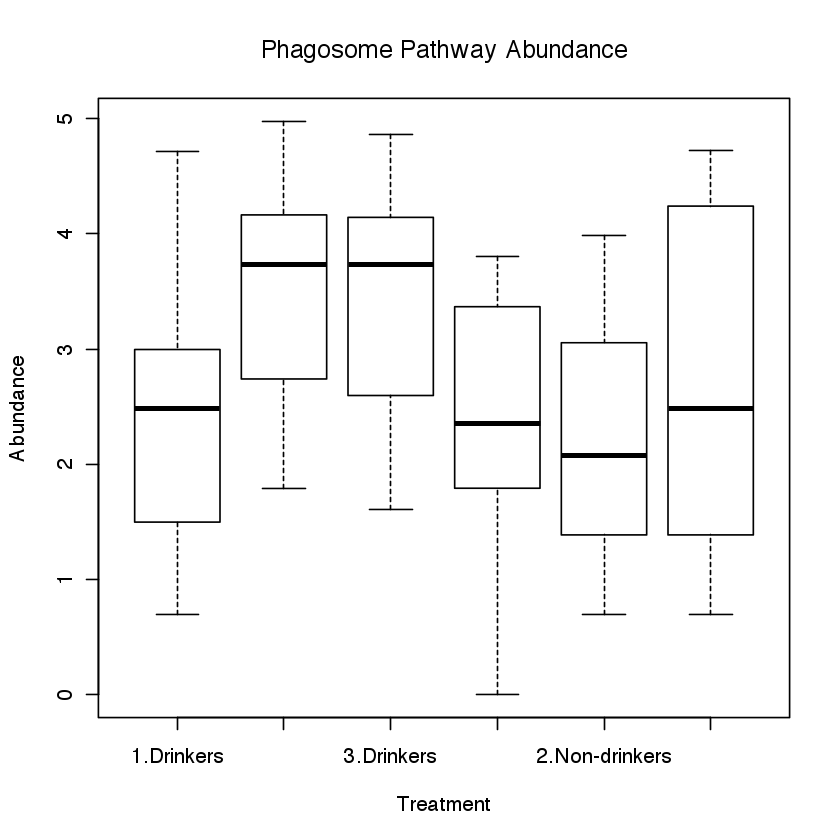

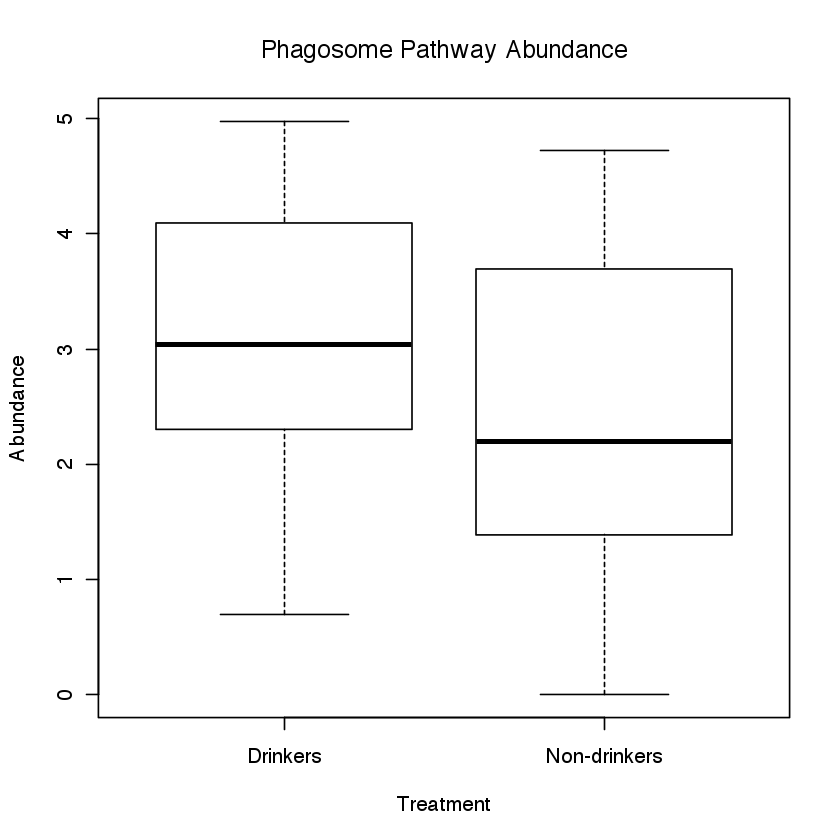

In [74]:
#Phagosome
      #Time*Treatment
      lm.phagosome<-lm(log(catFunction_taxa$Phagosome+1)~Time_point*Treatment)
      summary(lm.phagosome)
      boxplot(log(catFunction_taxa$Phagosome+1)~Time_point*Treatment, main="Phagosome Pathway Abundance", xlab="Treatment", ylab="Abundance")
      #Treatment #Greater in drinkers
      lm.phagosome<-lm(log(catFunction_taxa$Phagosome+1)~Treatment)
      summary(lm.phagosome)
      boxplot(log(catFunction_taxa$Phagosome+1)~Treatment, main="Phagosome Pathway Abundance", xlab="Treatment", ylab="Abundance")
      
   


Call:
lm(formula = log(catFunction_taxa$Vibrio.cholerae.infection + 
    1) ~ Time_point * Treatment)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.27884 -0.94012 -0.06414  1.02889  2.13041 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       2.15744    0.54544   3.955 0.000199 ***
Time_point                        0.47490    0.24911   1.906 0.061237 .  
TreatmentNon-drinkers            -0.03767    0.78901  -0.048 0.962079    
Time_point:TreatmentNon-drinkers -0.31583    0.36061  -0.876 0.384498    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.194 on 62 degrees of freedom
Multiple R-squared:  0.1308,	Adjusted R-squared:  0.08871 
F-statistic: 3.109 on 3 and 62 DF,  p-value: 0.03269



Call:
lm(formula = log(catFunction_taxa$Vibrio.cholerae.infection + 
    1) ~ Treatment)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4429 -0.9013 -0.1329  0.9977  2.2845 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)             3.1212     0.2079  15.010   <2e-16 ***
TreatmentNon-drinkers  -0.6783     0.2986  -2.271   0.0265 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.213 on 64 degrees of freedom
Multiple R-squared:  0.0746,	Adjusted R-squared:  0.06014 
F-statistic: 5.159 on 1 and 64 DF,  p-value: 0.02649


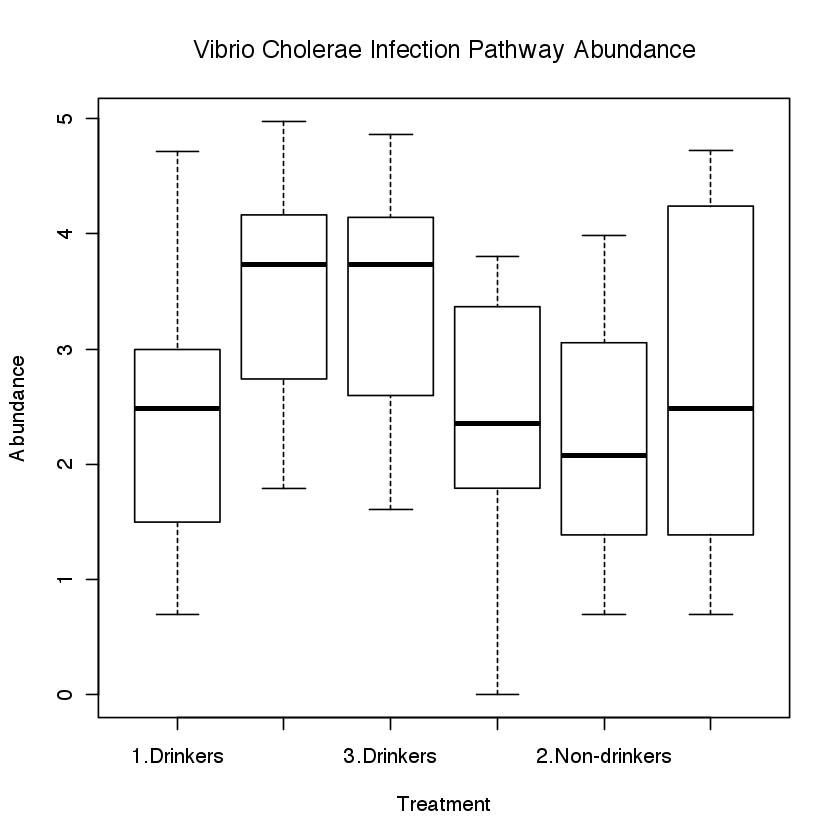

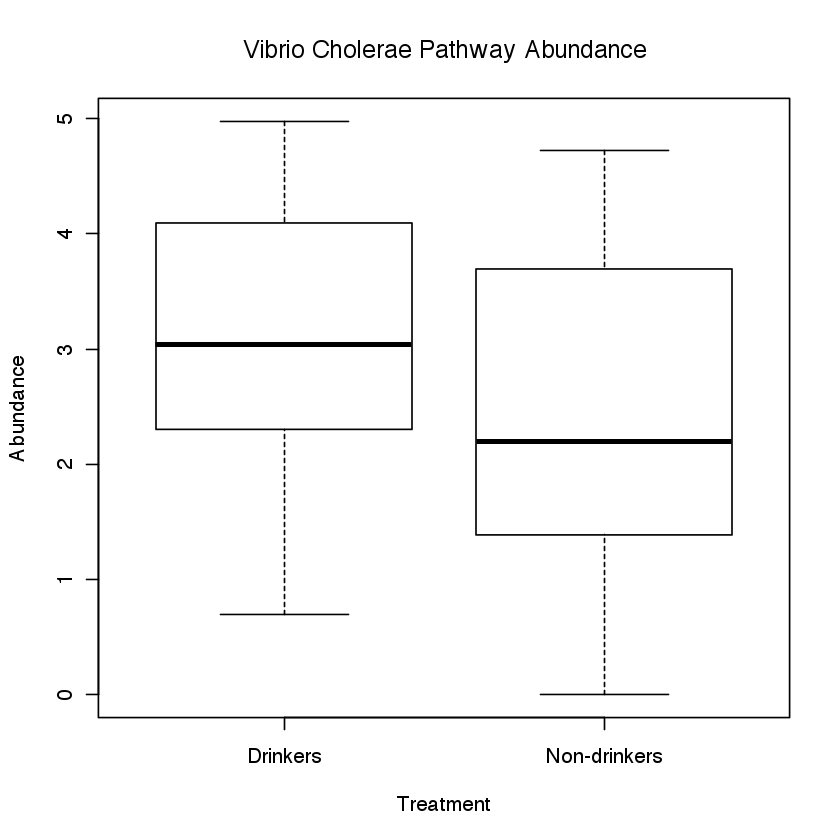

In [75]:
#Vibrio cholerae Infection
      #Time*Treatment
      lm.vibrio<-lm(log(catFunction_taxa$Vibrio.cholerae.infection+1)~Time_point*Treatment)
      summary(lm.vibrio)
      boxplot(log(catFunction_taxa$Vibrio.cholerae.infection+1)~Time_point*Treatment, main="Vibrio Cholerae Infection Pathway Abundance", xlab="Treatment", ylab="Abundance")
      #Treatment #Greater in drinkers
      lm.vibrio<-lm(log(catFunction_taxa$Vibrio.cholerae.infection+1)~Treatment)
      summary(lm.vibrio)
      boxplot(log(catFunction_taxa$Vibrio.cholerae.infection+1)~Treatment, main="Vibrio Cholerae Pathway Abundance", xlab="Treatment", ylab="Abundance")
      
   


Call:
lm(formula = log(catFunction_taxa$mRNA.surveillance.pathway + 
    1) ~ Time_point * Treatment)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8644 -0.9676 -0.0310  1.0499  2.2119 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       2.75376    0.58136   4.737 1.31e-05 ***
Time_point                        0.50038    0.26552   1.885   0.0642 .  
TreatmentNon-drinkers            -0.05929    0.84097  -0.070   0.9440    
Time_point:TreatmentNon-drinkers -0.33048    0.38436  -0.860   0.3932    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.273 on 62 degrees of freedom
Multiple R-squared:  0.131,	Adjusted R-squared:  0.08893 
F-statistic: 3.115 on 3 and 62 DF,  p-value: 0.03246



Call:
lm(formula = log(catFunction_taxa$mRNA.surveillance.pathway + 
    1) ~ Treatment)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0396 -0.9126 -0.1057  1.0347  2.3765 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)             3.7692     0.2215  17.017   <2e-16 ***
TreatmentNon-drinkers  -0.7297     0.3181  -2.294   0.0251 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.292 on 64 degrees of freedom
Multiple R-squared:  0.07596,	Adjusted R-squared:  0.06153 
F-statistic: 5.261 on 1 and 64 DF,  p-value: 0.0251


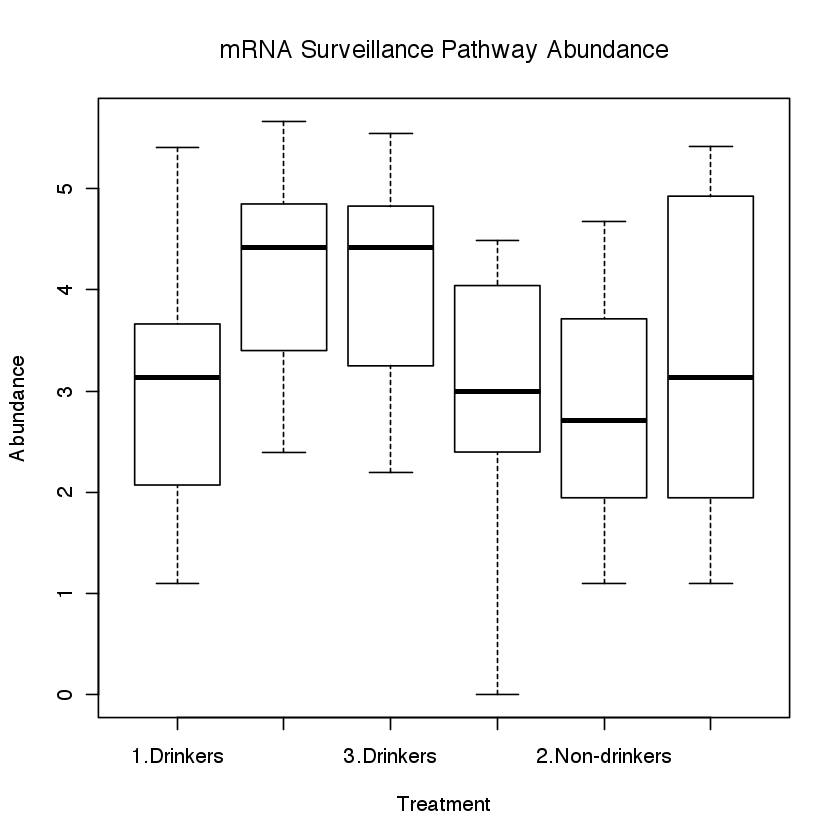

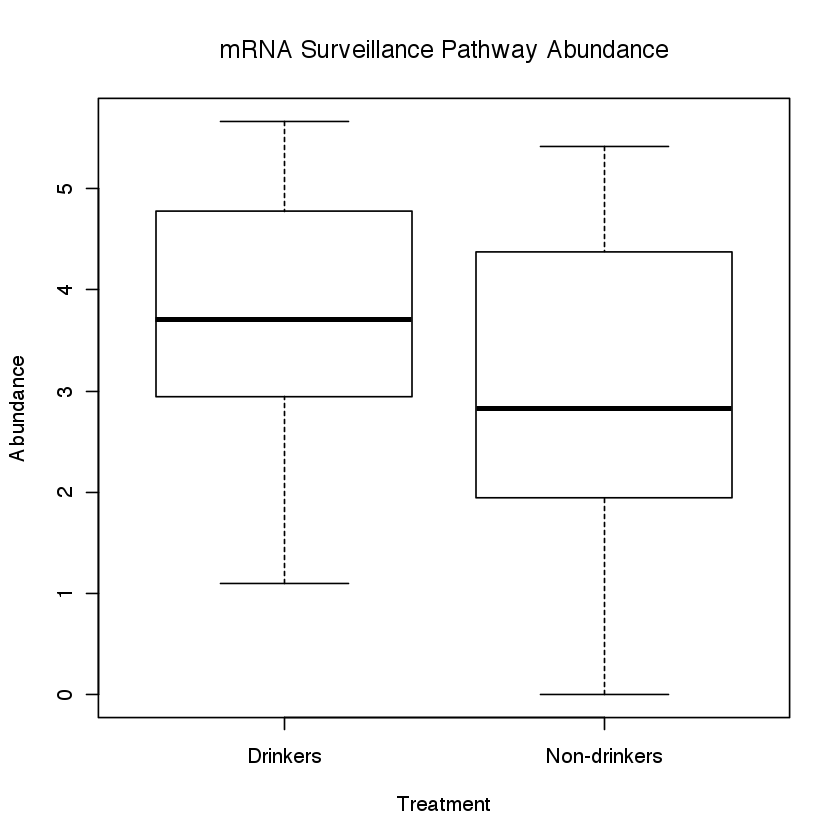

In [76]:
#mRNA Surveillance Pathway
      #Time*Treatment
      lm.mRNA<-lm(log(catFunction_taxa$mRNA.surveillance.pathway+1)~Time_point*Treatment)
      summary(lm.mRNA)
      boxplot(log(catFunction_taxa$mRNA.surveillance.pathway+1)~Time_point*Treatment, main="mRNA Surveillance Pathway Abundance", xlab="Treatment", ylab="Abundance")
      #Treatment #Greater in drinkers
      lm.mRNA<-lm(log(catFunction_taxa$mRNA.surveillance.pathway+1)~Treatment)
      summary(lm.mRNA)
      boxplot(log(catFunction_taxa$mRNA.surveillance.pathway+1)~Treatment, main="mRNA Surveillance Pathway Abundance", xlab="Treatment", ylab="Abundance")
      
   


Call:
lm(formula = log(catFunction_taxa$mTOR.signaling.pathway + 1) ~ 
    Time_point * Treatment)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.27884 -0.94012 -0.06414  1.02889  2.13041 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       2.15744    0.54544   3.955 0.000199 ***
Time_point                        0.47490    0.24911   1.906 0.061237 .  
TreatmentNon-drinkers            -0.03767    0.78901  -0.048 0.962079    
Time_point:TreatmentNon-drinkers -0.31583    0.36061  -0.876 0.384498    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.194 on 62 degrees of freedom
Multiple R-squared:  0.1308,	Adjusted R-squared:  0.08871 
F-statistic: 3.109 on 3 and 62 DF,  p-value: 0.03269



Call:
lm(formula = log(catFunction_taxa$mTOR.signaling.pathway + 1) ~ 
    Treatment)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4429 -0.9013 -0.1329  0.9977  2.2845 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)             3.1212     0.2079  15.010   <2e-16 ***
TreatmentNon-drinkers  -0.6783     0.2986  -2.271   0.0265 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.213 on 64 degrees of freedom
Multiple R-squared:  0.0746,	Adjusted R-squared:  0.06014 
F-statistic: 5.159 on 1 and 64 DF,  p-value: 0.02649


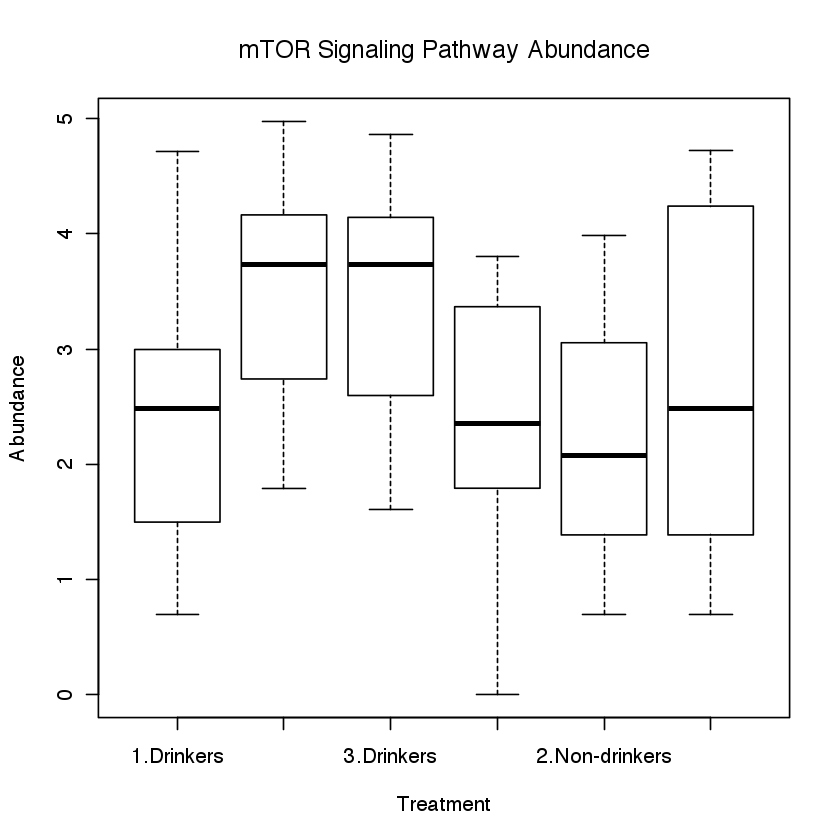

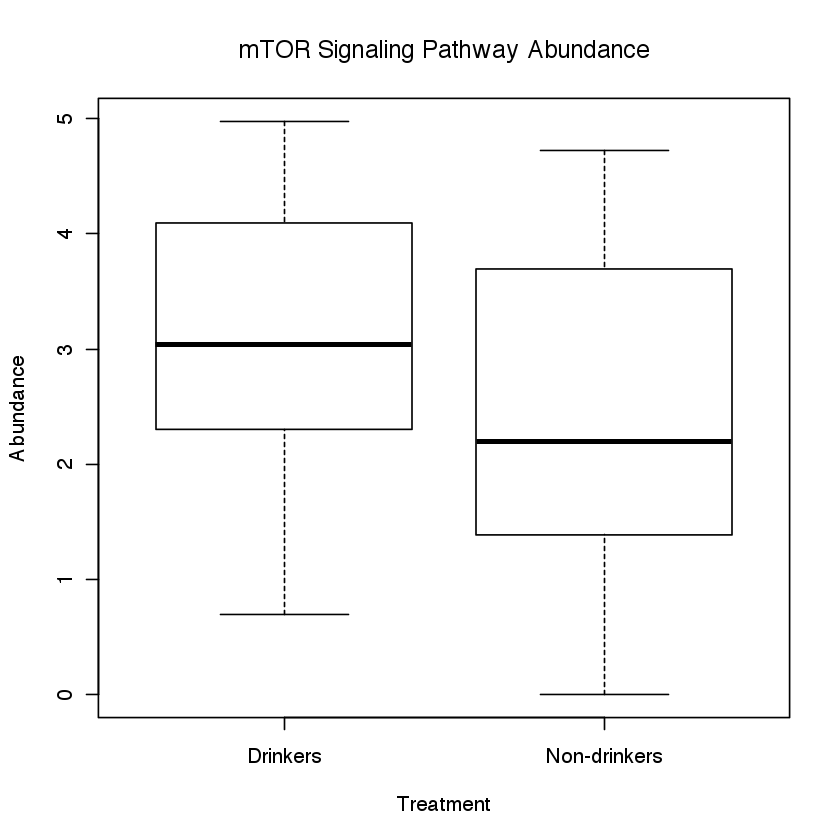

In [77]:
#mTOR Signaling Pathway
      #Time*Treatment
      lm.mTOR<-lm(log(catFunction_taxa$mTOR.signaling.pathway+1)~Time_point*Treatment)
      summary(lm.mTOR)
      boxplot(log(catFunction_taxa$mTOR.signaling.pathway+1)~Time_point*Treatment, main="mTOR Signaling Pathway Abundance", xlab="Treatment", ylab="Abundance")
      #Treatment #Greater in drinkers
      lm.mTOR<-lm(log(catFunction_taxa$mTOR.signaling.pathway+1)~Treatment)
      summary(lm.mTOR)
      boxplot(log(catFunction_taxa$mTOR.signaling.pathway+1)~Treatment, main="mTOR Signaling Pathway Abundance", xlab="Treatment", ylab="Abundance")
      
   


Call:
lm(formula = log(catFunction_taxa$Ion.channels + 1) ~ Time_point * 
    Treatment)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.58667 -0.41743 -0.07162  0.52397  1.30824 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        5.1674     0.2964  17.434   <2e-16 ***
Time_point                         0.2891     0.1354   2.135   0.0367 *  
TreatmentNon-drinkers              0.7269     0.4288   1.695   0.0950 .  
Time_point:TreatmentNon-drinkers  -0.1634     0.1960  -0.834   0.4077    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6488 on 62 degrees of freedom
Multiple R-squared:  0.1562,	Adjusted R-squared:  0.1154 
F-statistic: 3.825 on 3 and 62 DF,  p-value: 0.01402



Call:
lm(formula = log(catFunction_taxa$Ion.channels + 1) ~ Treatment)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.59517 -0.45587 -0.06372  0.52388  1.45824 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)             5.7541     0.1141  50.411   <2e-16 ***
TreatmentNon-drinkers   0.3956     0.1639   2.413   0.0187 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6656 on 64 degrees of freedom
Multiple R-squared:  0.08342,	Adjusted R-squared:  0.0691 
F-statistic: 5.825 on 1 and 64 DF,  p-value: 0.01867


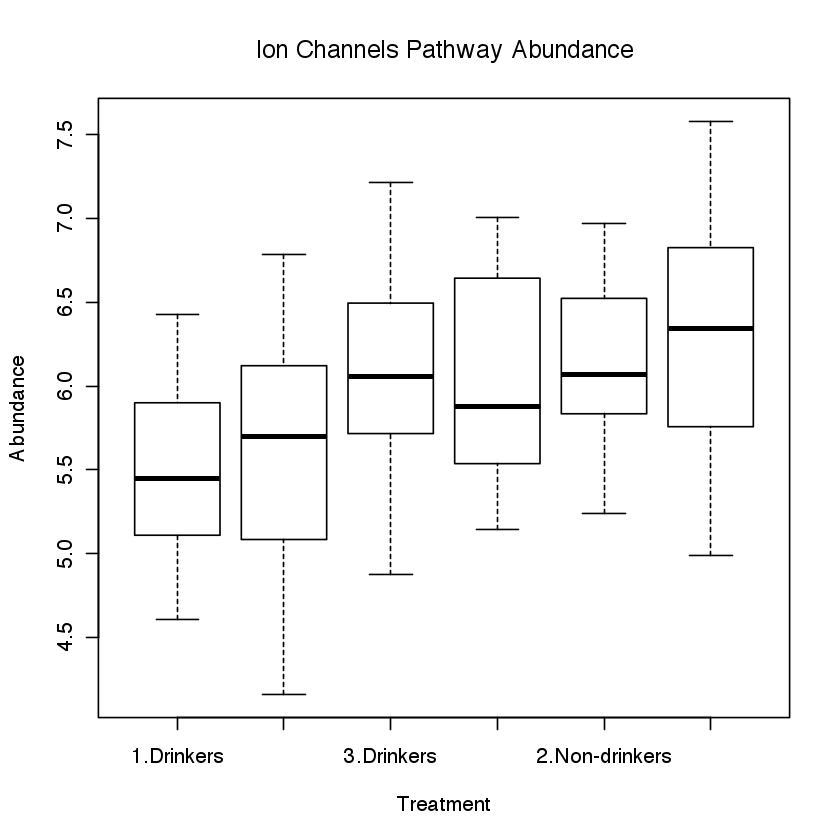

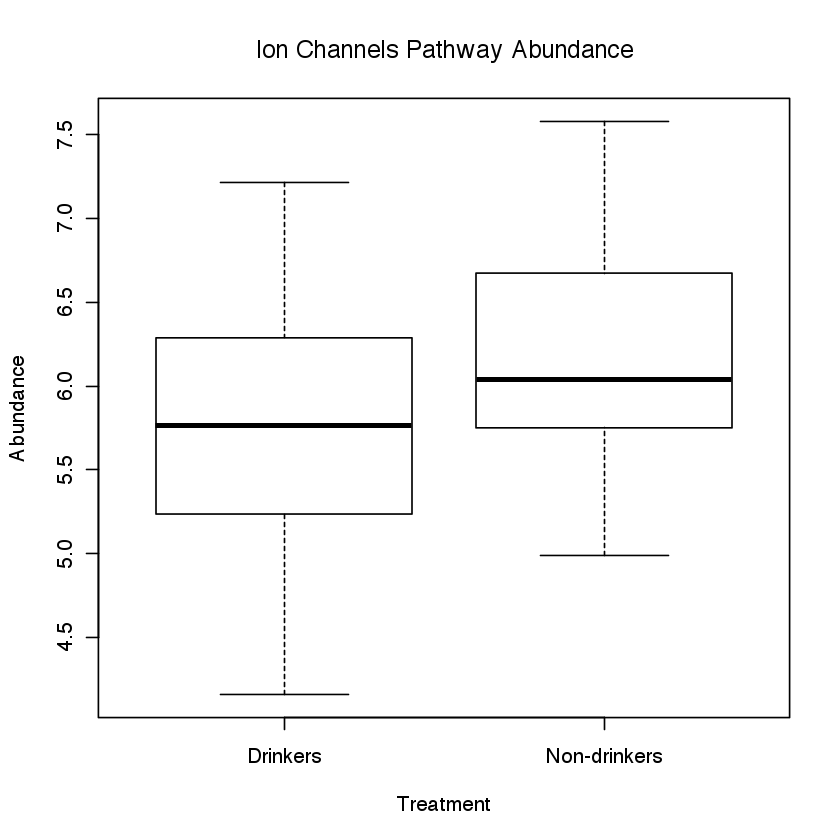

In [78]:
#Ion Channels
      #Time*Treatment
      lm.ion<-lm(log(catFunction_taxa$Ion.channels+1)~Time_point*Treatment)
      summary(lm.ion)
      boxplot(log(catFunction_taxa$Ion.channels+1)~Time_point*Treatment, main="Ion Channels Pathway Abundance", xlab="Treatment", ylab="Abundance")
      #Treatment #Significantly lower in drinkers
      lm.ion<-lm(log(catFunction_taxa$Ion.channels+1)~Treatment)
      summary(lm.ion)
      boxplot(log(catFunction_taxa$Ion.channels+1)~Treatment, main="Ion Channels Pathway Abundance", xlab="Treatment", ylab="Abundance")
      
  


Call:
lm(formula = log(catFunction_taxa$Basal.transcription.factors + 
    1) ~ Time_point * Treatment)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.62278 -0.90854 -0.03827  1.04702  2.20787 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       3.11482    0.57806   5.388 1.17e-06 ***
Time_point                        0.51737    0.26401   1.960   0.0545 .  
TreatmentNon-drinkers             0.05297    0.83620   0.063   0.9497    
Time_point:TreatmentNon-drinkers -0.36923    0.38217  -0.966   0.3377    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.265 on 62 degrees of freedom
Multiple R-squared:  0.1282,	Adjusted R-squared:  0.08601 
F-statistic: 3.039 on 3 and 62 DF,  p-value: 0.03554



Call:
lm(formula = log(catFunction_taxa$Basal.transcription.factors + 
    1) ~ Treatment)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7785 -0.9168 -0.1043  1.0433  2.3514 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)             4.1648     0.2206  18.881   <2e-16 ***
TreatmentNon-drinkers  -0.6961     0.3168  -2.197   0.0316 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.286 on 64 degrees of freedom
Multiple R-squared:  0.07015,	Adjusted R-squared:  0.05562 
F-statistic: 4.828 on 1 and 64 DF,  p-value: 0.03162


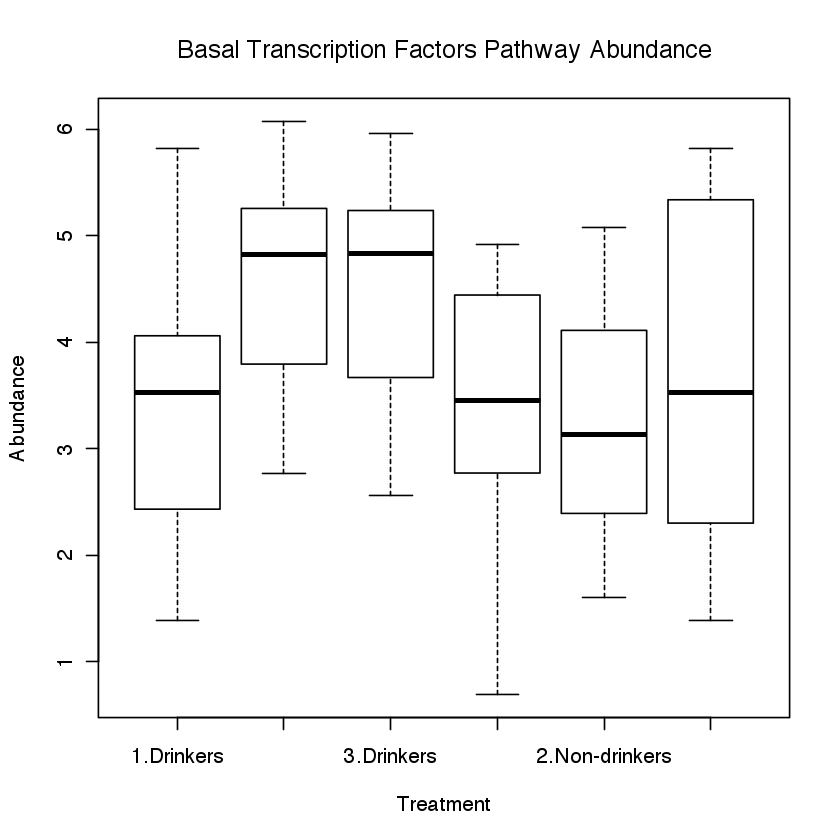

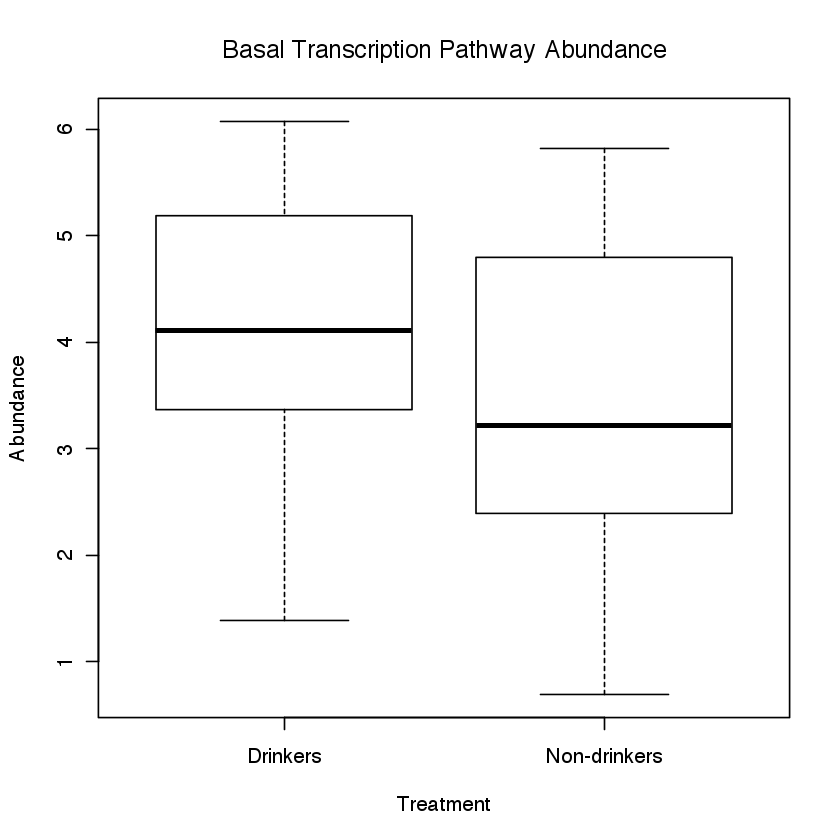

In [79]:
#Basal transcription factors
      #Time*Treatment
      lm.basal<-lm(log(catFunction_taxa$Basal.transcription.factors+1)~Time_point*Treatment)
      summary(lm.basal)
      boxplot(log(catFunction_taxa$Basal.transcription.factors+1)~Time_point*Treatment, main="Basal Transcription Factors Pathway Abundance", xlab="Treatment", ylab="Abundance")
      #Treatment #Greater in drinkers
      lm.basal<-lm(log(catFunction_taxa$Basal.transcription.factors+1)~Treatment)
      summary(lm.basal)
      boxplot(log(catFunction_taxa$Basal.transcription.factors+1)~Treatment, main="Basal Transcription Pathway Abundance", xlab="Treatment", ylab="Abundance")
      
  


Call:
lm(formula = log(catFunction_taxa$G.protein.coupled.receptors + 
    1) ~ Time_point * Treatment)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3633 -1.3715 -0.7161  1.5516  3.4137 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)  
(Intercept)                        1.4037     0.7713   1.820   0.0736 .
Time_point                         0.4505     0.3522   1.279   0.2057  
TreatmentNon-drinkers              2.2983     1.1157   2.060   0.0436 *
Time_point:TreatmentNon-drinkers  -0.6906     0.5099  -1.354   0.1805  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.688 on 62 degrees of freedom
Multiple R-squared:  0.09763,	Adjusted R-squared:  0.05397 
F-statistic: 2.236 on 3 and 62 DF,  p-value: 0.09288



Call:
lm(formula = log(catFunction_taxa$G.protein.coupled.receptors + 
    1) ~ Treatment)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3179 -1.2562 -0.7085  1.5674  3.7055 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)             2.3179     0.2897   8.002  3.2e-11 ***
TreatmentNon-drinkers   0.8965     0.4160   2.155   0.0349 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.689 on 64 degrees of freedom
Multiple R-squared:  0.06765,	Adjusted R-squared:  0.05308 
F-statistic: 4.644 on 1 and 64 DF,  p-value: 0.03493


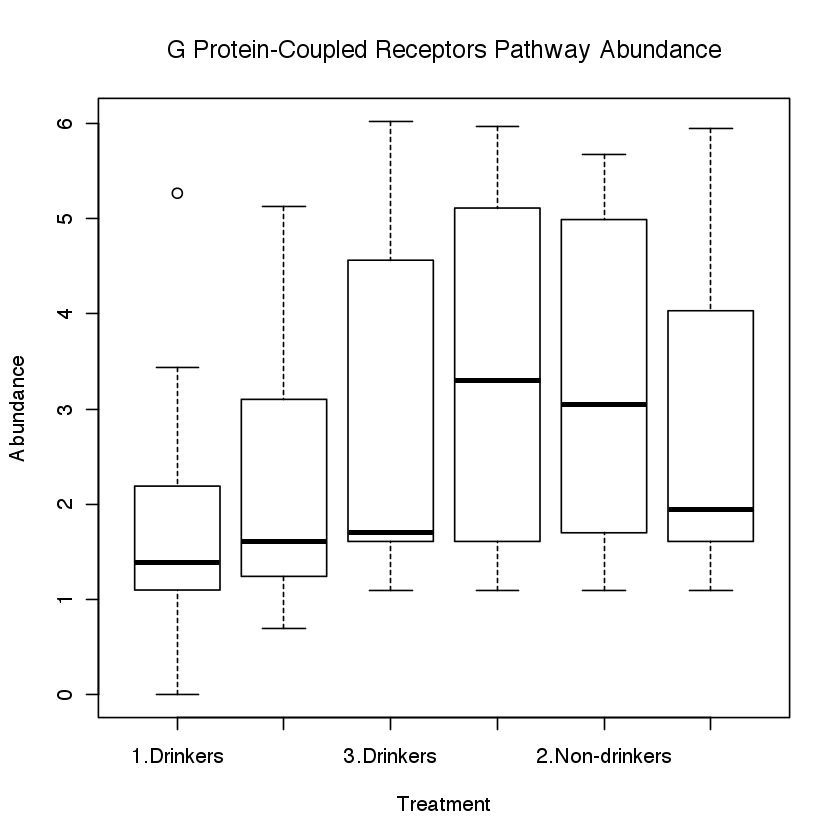

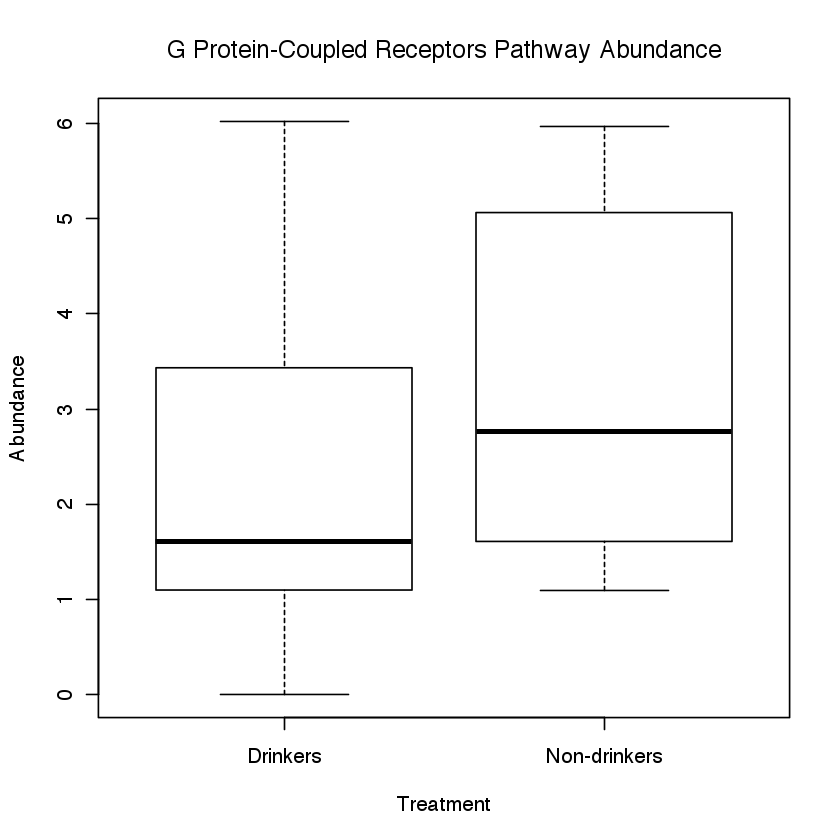

In [80]:
#G protein-couples receptors
      #Time*Treatment
      lm.gprot<-lm(log(catFunction_taxa$G.protein.coupled.receptors+1)~Time_point*Treatment)
      summary(lm.gprot)
      boxplot(log(catFunction_taxa$G.protein.coupled.receptors+1)~Time_point*Treatment, main="G Protein-Coupled Receptors Pathway Abundance", xlab="Treatment", ylab="Abundance")
      #Treatment #Lower in drinkers
      lm.gprot<-lm(log(catFunction_taxa$G.protein.coupled.receptors+1)~Treatment)
      summary(lm.gprot)
      boxplot(log(catFunction_taxa$G.protein.coupled.receptors+1)~Treatment, main="G Protein-Coupled Receptors Pathway Abundance", xlab="Treatment", ylab="Abundance")